In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(glue)
    library(ggpointdensity)
})

In [2]:
options(repr.plot.width=10, repr.plot.height=6)
theme_set(theme_custom())

In [3]:
root <- "/lab/work/vivekrai/2021-08_main-rfx6/"

In [4]:
barcode_mapping <- data.frame(
    atac_barcode = read.table("/home/porchard/github/snATACseq-NextFlow/737K-arc-v1.txt", header = F)[[1]],
    rna_barcode = read.table("/home/porchard/github/snRNAseq-NextFlow/737K-arc-v1.txt", header = F)[[1]]
)

In [6]:
sample_table <- read.table(glue("{root}/data/sample_info.txt"), sep = "\t", header = T)
head(sample_table)

,Date,UNOS,Donor.ID,Center,Genotyped,Pseudoislet,MOI,Pellets,Tube
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,12/8/20,AHLA313-HPAP077-47yM,ND,Upenn,Yes,W-Scramble-mCherry,MOI 500,2x50; 1x40,1
2,12/9/20,AHLA313-HPAP077-47yM,ND,Upenn,Yes,W-RFX6-2896-mKate2,MOI 500,2x50; 1x40,2
3,12/10/20,AHLA313-HPAP077-47yM,ND,Upenn,Yes,W-RFX6-2897-mCherry,MOI 500,2x50; 1x40,3
4,12/11/20,AHLA313-HPAP077-47yM,ND,Upenn,Yes,W-RFX6-3010-mCherry,MOI 500,2x50; 1x40,4
5,1/16/21,17277513-43yF-SC,ND,SC,Yes,W-Scramble-mCherry,MOI 500,1x100,2
6,1/17/21,17277513-43yF-SC,ND,SC,Yes,W-RFX6-2896-mKate2,MOI 500,1x100,3


In [7]:
head(barcode_mapping)

,atac_barcode,rna_barcode
,<chr>,<chr>
1,ACAGCGGGTGTGTTAC,AAACAGCCAAACAACA
2,ACAGCGGGTTGTTCTT,AAACAGCCAAACATAG
3,ACAGCGGGTAACAGGC,AAACAGCCAAACCCTA
4,ACAGCGGGTGCGCGAA,AAACAGCCAAACCTAT
5,ACAGCGGGTCCTCCAT,AAACAGCCAAACCTTG
6,ACAGCGGGTCATGGTT,AAACAGCCAAACGCGA


In [32]:
## Load data
rna_qc <- lapply(list.files(glue("{root}/work/rnaseq/qc"), ".txt", full.names = T), function(x) {
    df <- read.table(x, header = T)
    sample_col <- str_split(basename(x), "-", simplify = T)
    df$Sample <- paste0(sample_col[, 1], "_", sample_col[, 2], sample_col[, 3])
    df
}) %>% bind_rows()

rna_qc$Sample <- gsub("-hg19-mCherry-mKate2", "", rna_qc$Sample)
rna_qc$umis <- as.integer(rna_qc$umis)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [33]:
head(rna_qc); dim(rna_qc)

,barcode,total_reads,uniquely_mapped_reads,secondary_alignments,supplementary_alignments,umis,fraction_mitochondrial,Sample
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,no_barcode,10873694,8178059,2168365,0,NA,0.025812237,3776_CV1
2,TATGACATCATGCTTT,9295,8331,588,0,5249,0.003360941,3776_CV1
3,ACTTATCTCAAGCTTA,539494,492750,34336,0,332971,0.037020802,3776_CV1
4,AAGGATGTCCCTCTAA,90497,81679,6963,0,47218,0.009451634,3776_CV1
5,TCATGCCTCCTAAATG,8306,7501,611,0,4434,0.002666311,3776_CV1
6,GCTGGATGTACCGAAC,51360,46442,3900,0,26931,0.016493691,3776_CV1


[1] 5808471       8

In [11]:
atac_libs = glue("3776_ATAC_CV{1:8}")
ataqv_metrics <- glue("{root}work/atacseq/ataqv/{atac_libs}.metrics.txt")
atac_qc <- lapply(ataqv_metrics, function(x) {
    df <- read.table(x, header = F)
    colnames(df) <- c("Sample", "Barcode", "Metric", "Value")
    df$Sample <- gsub("_ATAC", "", gsub("-hg19-mCherry-mKate2.ataqv.json.gz", "", basename(df$Sample)))
    df$Value <- as.numeric(df$Value)
    df
}) %>% bind_rows()

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"
Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"


In [12]:
atac_qc <- atac_qc %>% pivot_wider(id_cols = c(Sample, Barcode), names_from = Metric, values_from = Value)

In [34]:
head(atac_qc); dim(atac_qc)

Sample,Barcode,tss_enrichment,percent_hqaa,hqaa,total_reads,total_autosomal_reads,percent_mitochondrial,percent_autosomal_duplicate,percent_duplicate,max_fraction_reads_from_single_autosome
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3776_CV1,AAACAAGCAAAGGACG,3.8314176,63.63229,2838,4460,3644,0.17937220,18.6333699,17.1076233,0.09090909
3776_CV1,AAACAAGCAAATATGC,4.6376812,65.03544,3854,5926,4986,0.16874789,19.5346972,17.7691529,0.09600415
3776_CV1,AAACAAGCAACGGGAA,0.5938242,64.54995,7695,11921,9918,0.31876520,18.5117967,17.3139837,0.08356075
3776_CV1,AAACAAGCAAGGACGA,4.6932618,67.58812,7555,11178,9560,0.08946144,18.6297071,17.5165504,0.09199206
3776_CV1,AAACAAGCAAGTCCTT,1.4598540,79.60152,839,1054,868,1.51802657,0.2304147,0.1897533,0.11680572
3776_CV1,AAACAAGCACCACAAA,1.5432099,64.87847,6833,10532,8749,0.24686669,18.5049720,17.5275351,0.09805356


[1] 472560     11

In [35]:
comb_df <- left_join(
    left_join(atac_qc, barcode_mapping, by = c("Barcode" = "atac_barcode")),
    rna_qc,
    by = c("Sample", "rna_barcode" = "barcode")
)

In [36]:
head(comb_df);
dim(comb_df)

Sample,Barcode,tss_enrichment,percent_hqaa,hqaa,total_reads.x,total_autosomal_reads,percent_mitochondrial,percent_autosomal_duplicate,percent_duplicate,max_fraction_reads_from_single_autosome,rna_barcode,total_reads.y,uniquely_mapped_reads,secondary_alignments,supplementary_alignments,umis,fraction_mitochondrial
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
3776_CV1,AAACAAGCAAAGGACG,3.8314176,63.63229,2838,4460,3644,0.17937220,18.6333699,17.1076233,0.09090909,GGCTAGTGTCGTTACT,142,98,34,0,73,0.020408163
3776_CV1,AAACAAGCAAATATGC,4.6376812,65.03544,3854,5926,4986,0.16874789,19.5346972,17.7691529,0.09600415,GGCTAGTGTAAACAAG,133,96,30,0,67,0.031250000
3776_CV1,AAACAAGCAACGGGAA,0.5938242,64.54995,7695,11921,9918,0.31876520,18.5117967,17.3139837,0.08356075,GGCTAGTGTAATCGCA,293,224,58,0,153,0.013392857
3776_CV1,AAACAAGCAAGGACGA,4.6932618,67.58812,7555,11178,9560,0.08946144,18.6297071,17.5165504,0.09199206,GGCTAGTGTGTGAGGA,6676,6082,452,0,3458,0.002137455
3776_CV1,AAACAAGCAAGTCCTT,1.4598540,79.60152,839,1054,868,1.51802657,0.2304147,0.1897533,0.11680572,GGCTAGTGTTGTGATG,10,8,1,0,7,0.000000000
3776_CV1,AAACAAGCACCACAAA,1.5432099,64.87847,6833,10532,8749,0.24686669,18.5049720,17.5275351,0.09805356,GGCTAGTGTACGCGCA,137,94,35,0,73,0.085106383


[1] 472560     18

## Plots

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 8355 rows containing missing values (geom_point)."


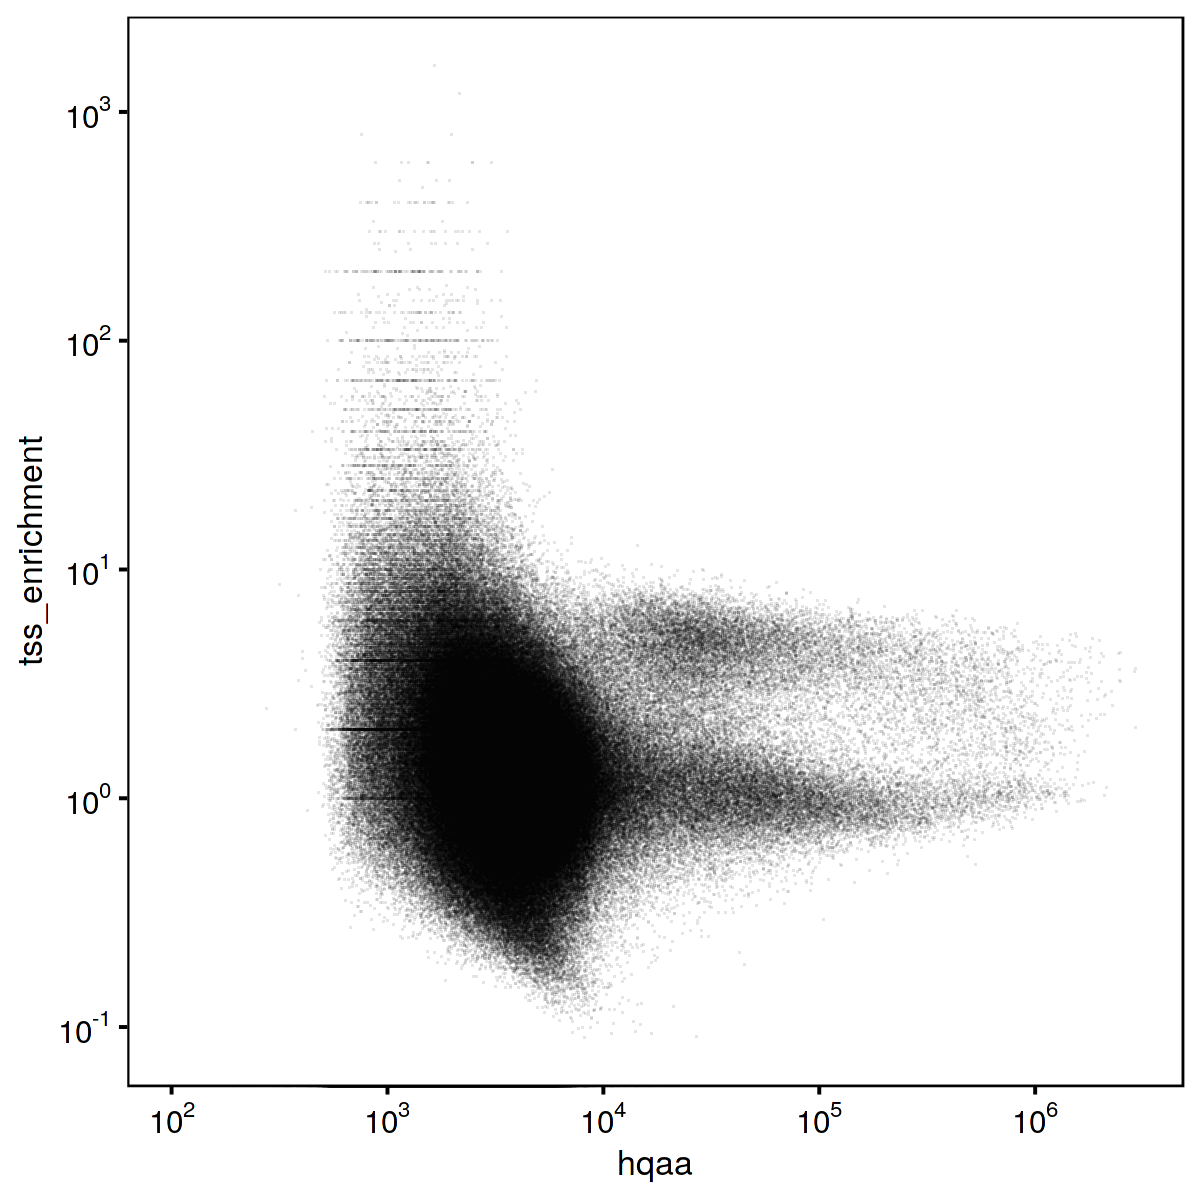

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(atac_qc, aes(hqaa, tss_enrichment)) +
    geom_point(shape = '.', alpha = .1) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 8355 rows containing missing values (geom_point)."


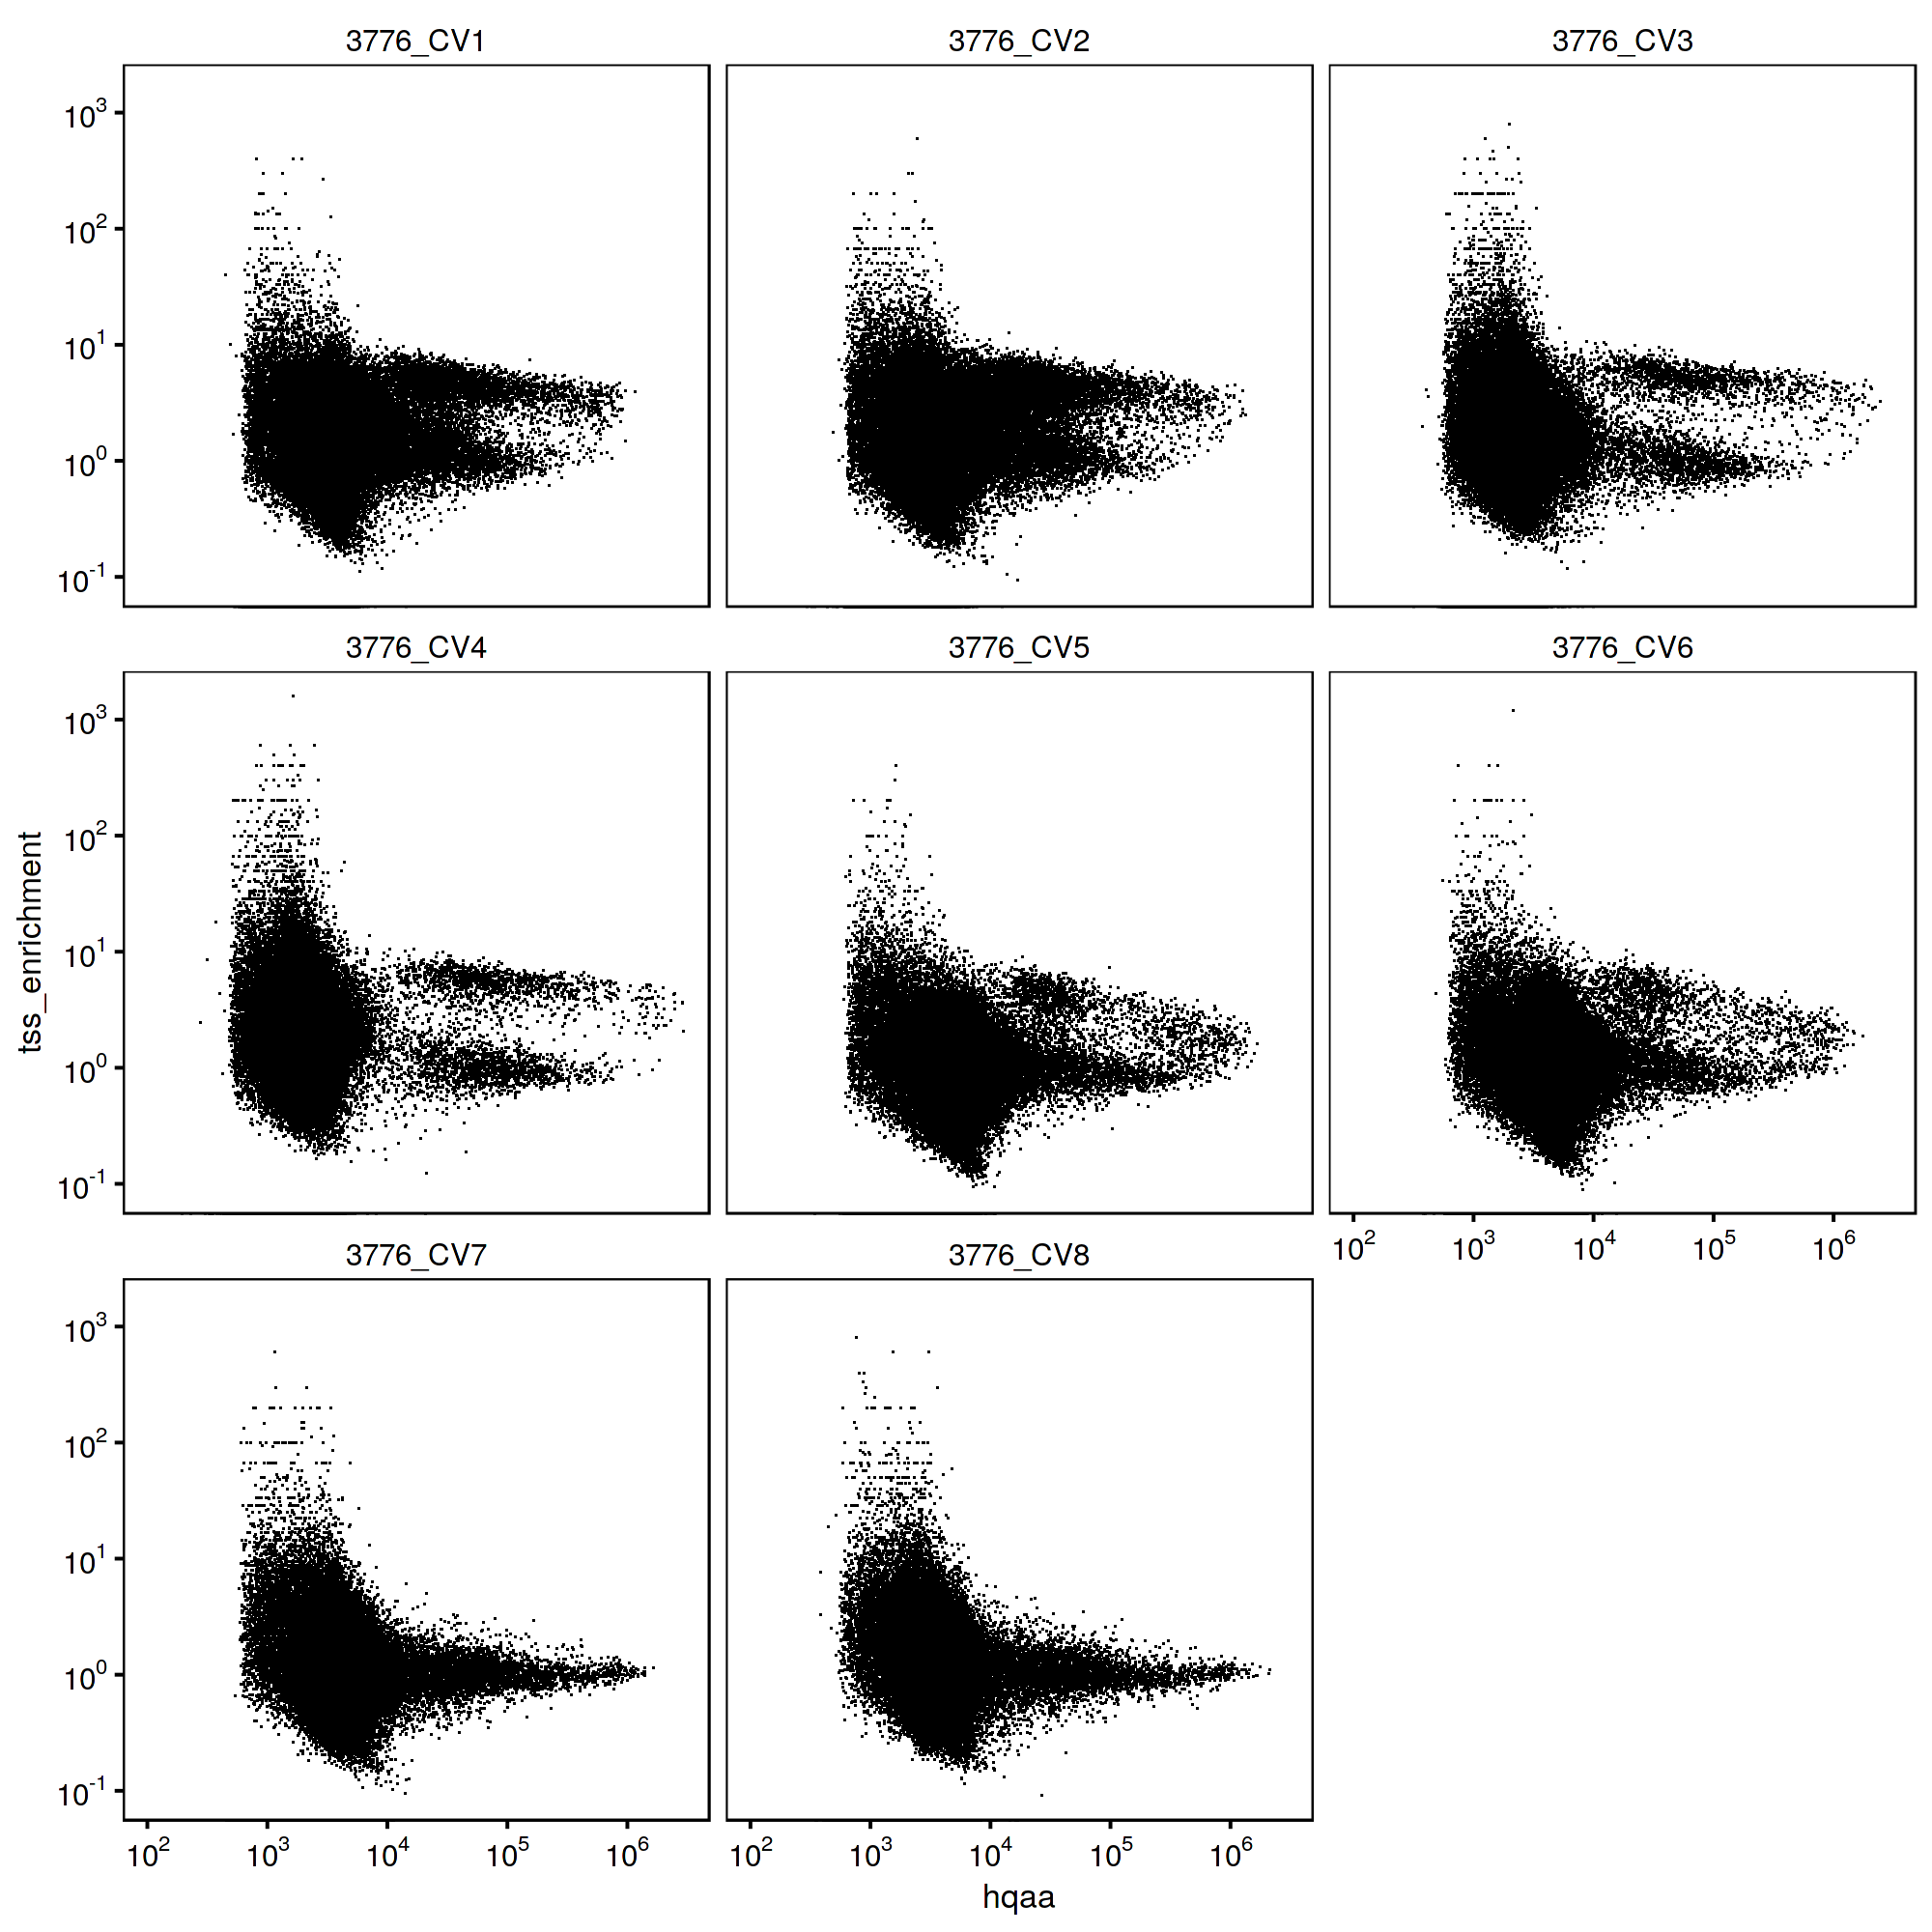

In [19]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(atac_qc, aes(hqaa, tss_enrichment)) +
    geom_point(shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    facet_wrap(~ Sample)

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


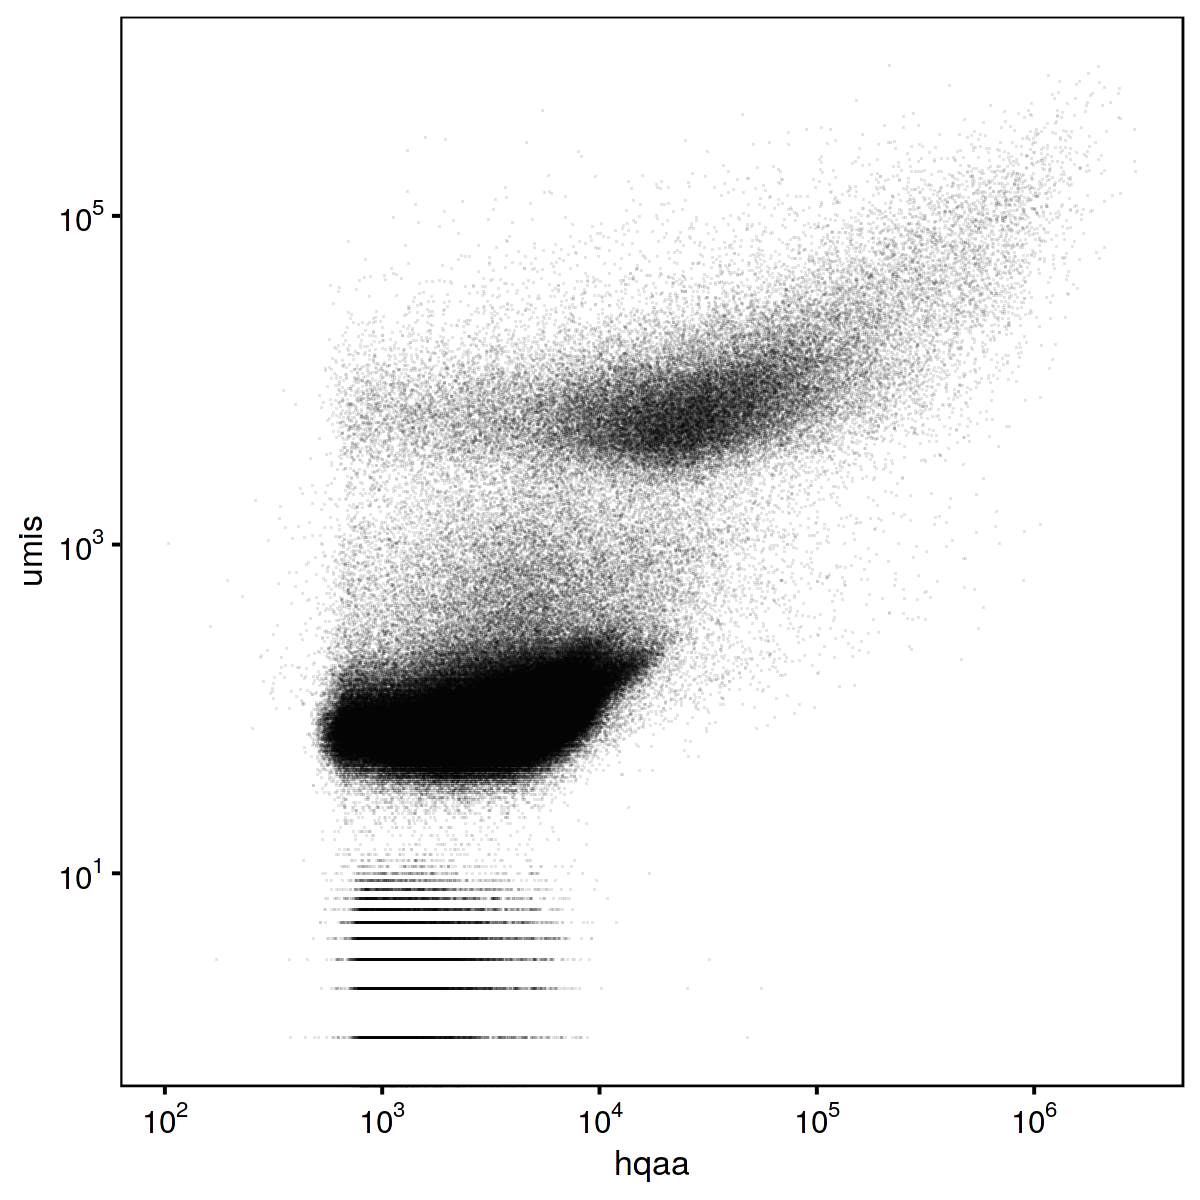

In [37]:
ggplot(comb_df, aes(hqaa, umis)) + geom_point(shape = '.', alpha = .1) + 
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


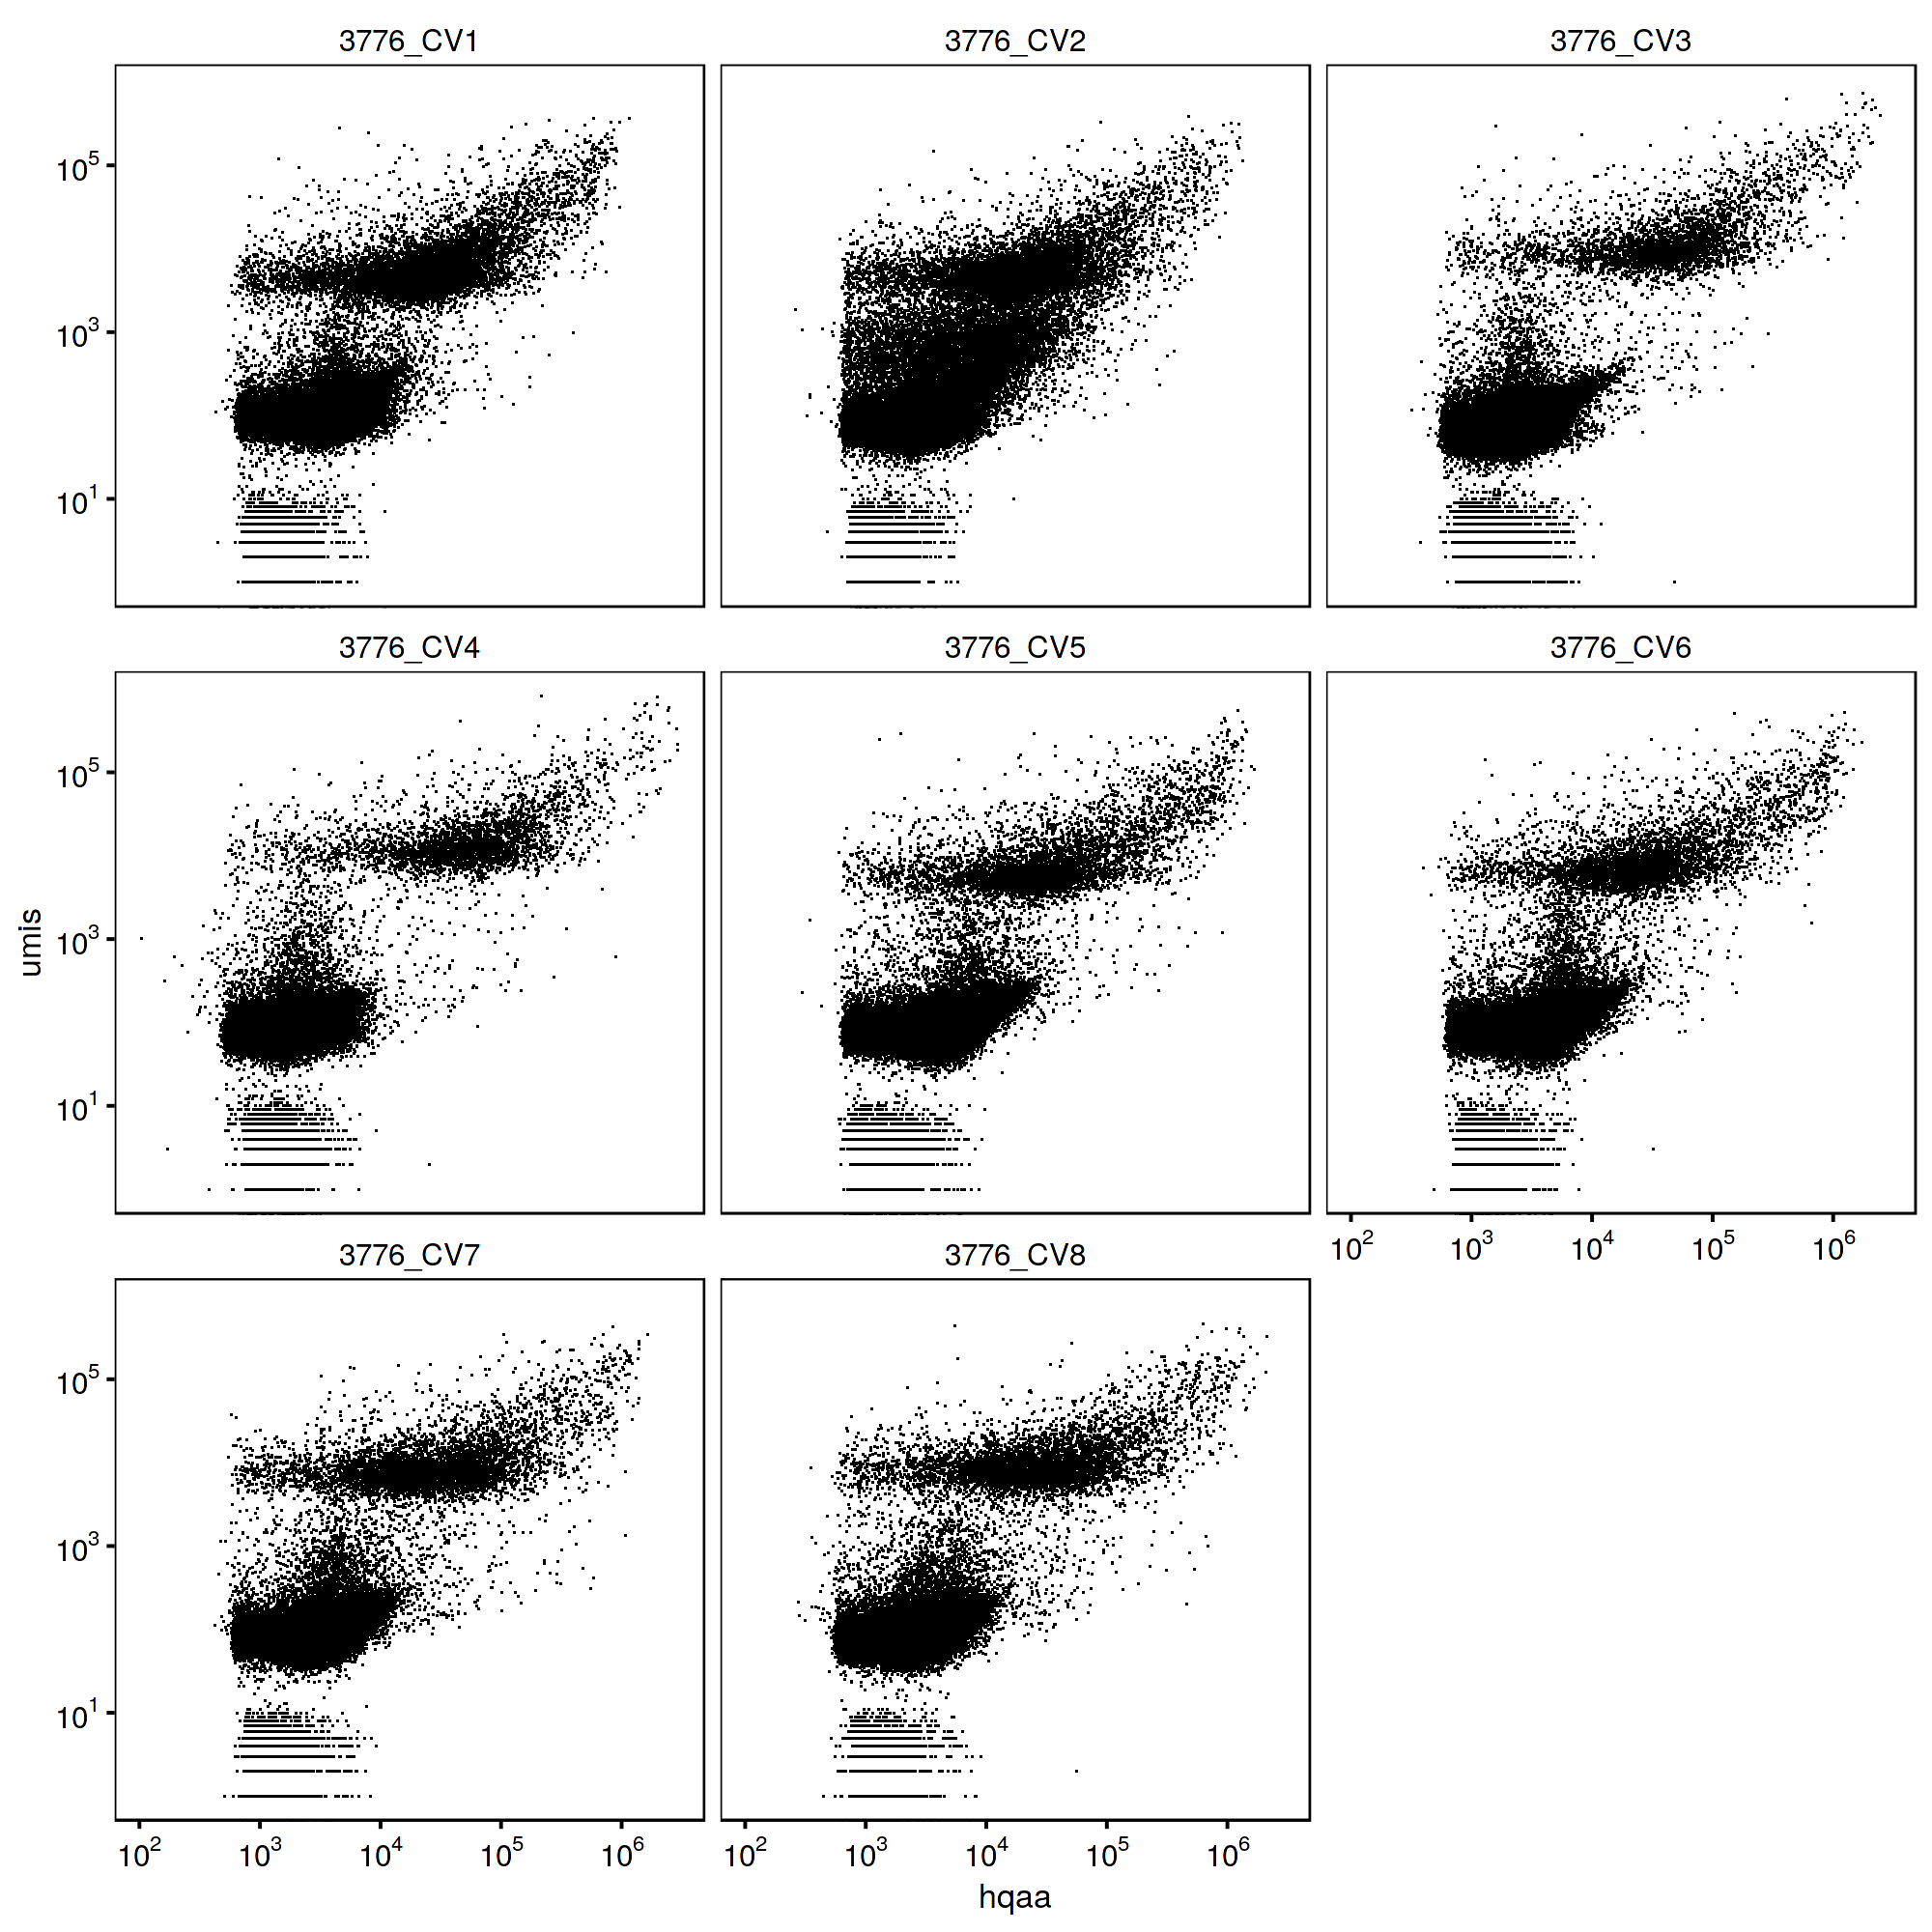

In [39]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(comb_df, aes(hqaa, umis)) + geom_point(shape = '.') + 
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    facet_wrap(~Sample)

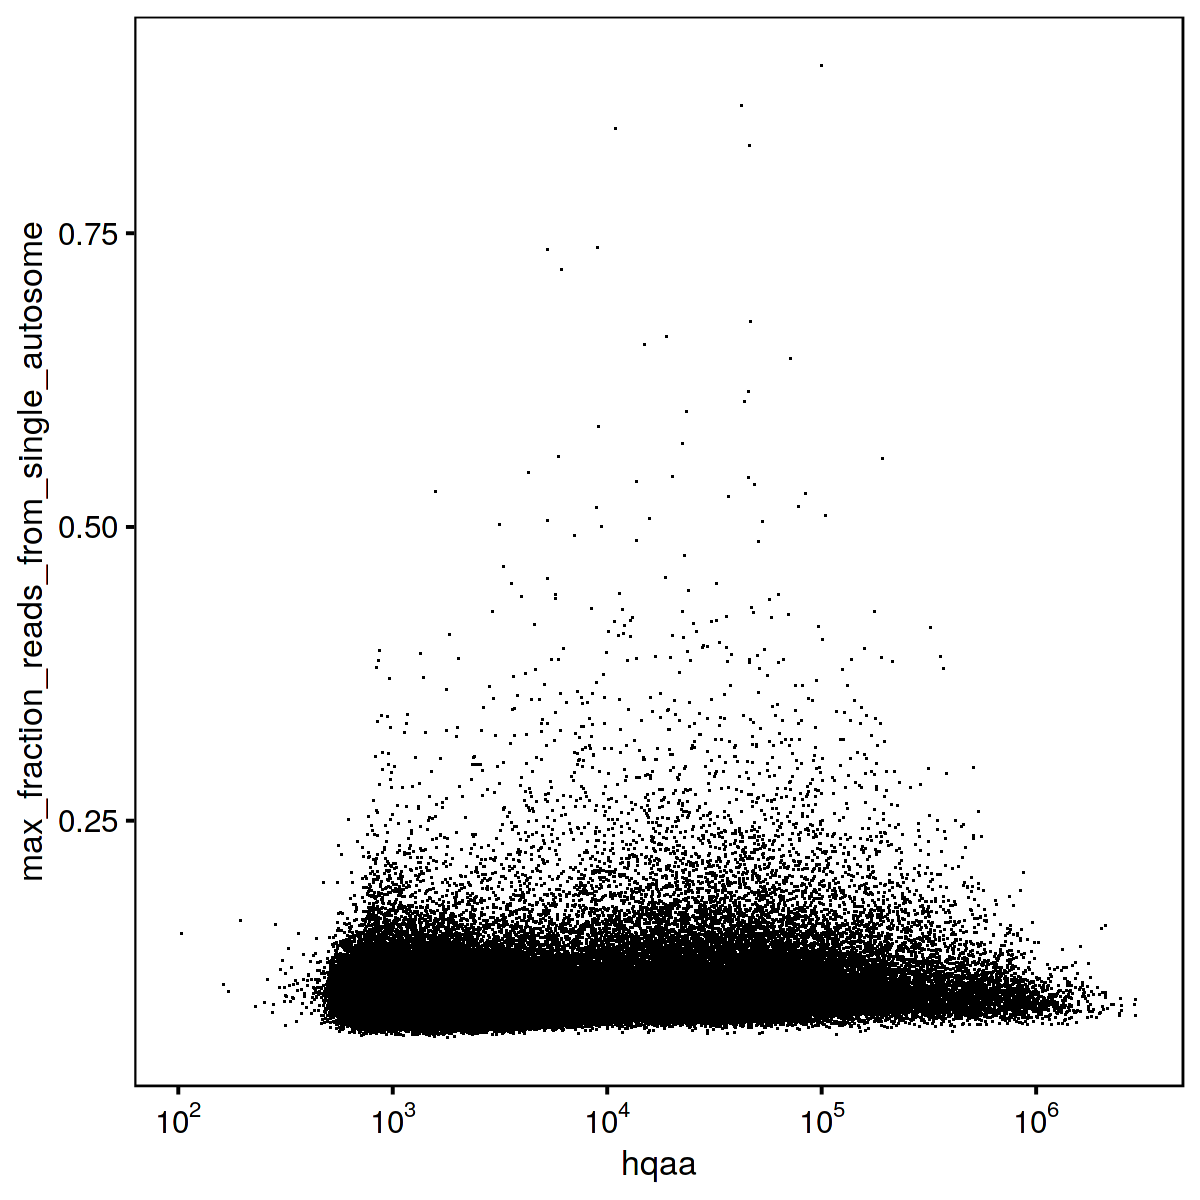

In [44]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(comb_df, aes(hqaa, max_fraction_reads_from_single_autosome)) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    geom_point(shape = '.')

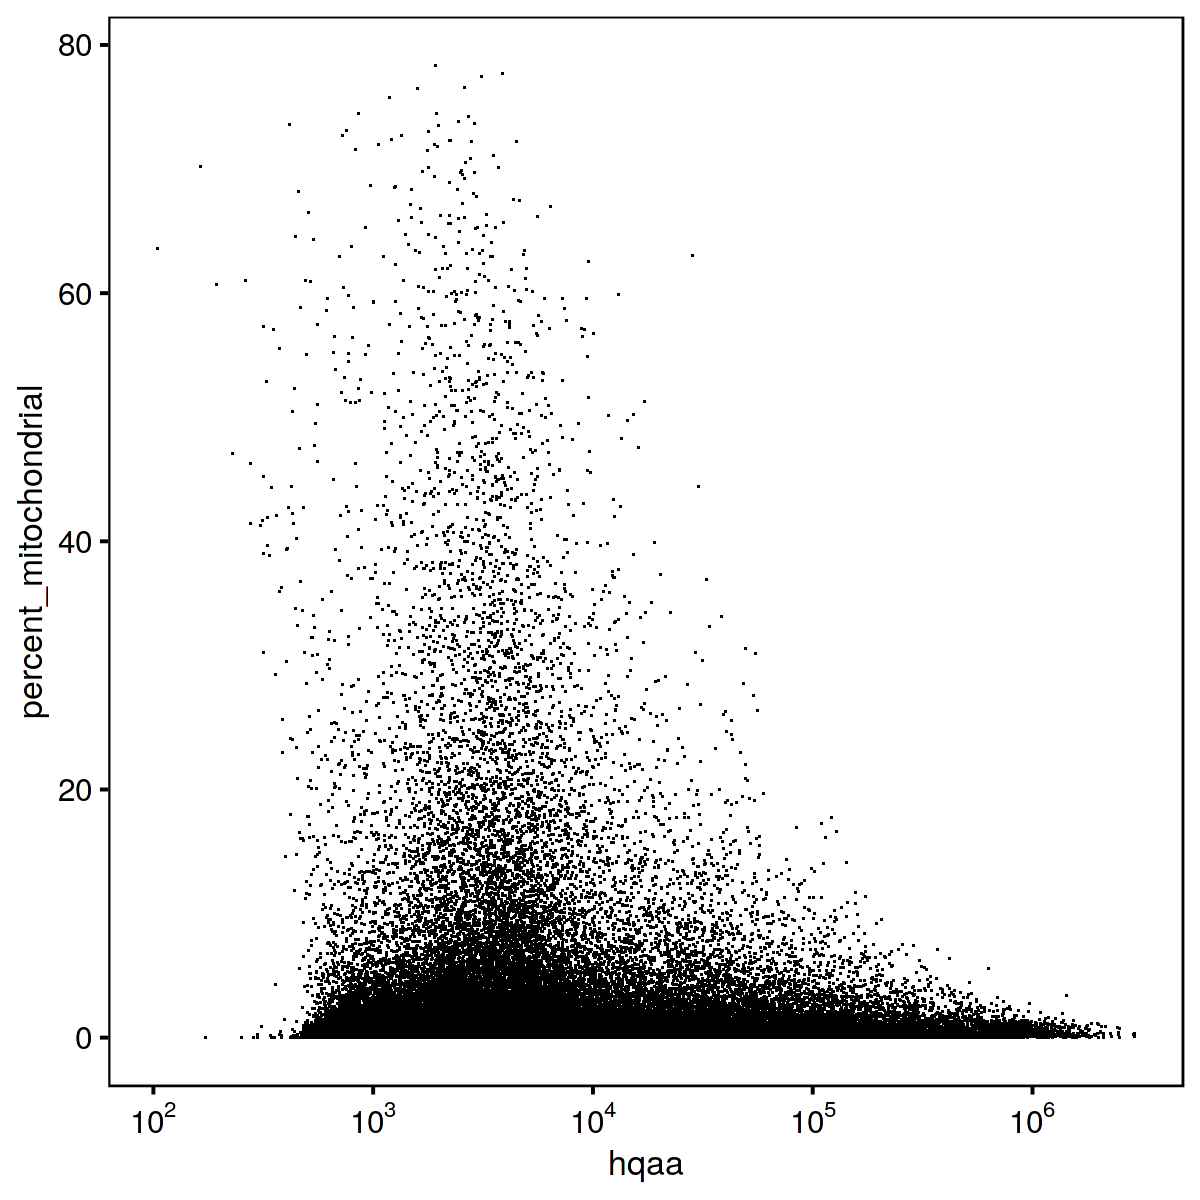

In [45]:
ggplot(comb_df, aes(hqaa, percent_mitochondrial)) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    geom_point(shape = '.') 

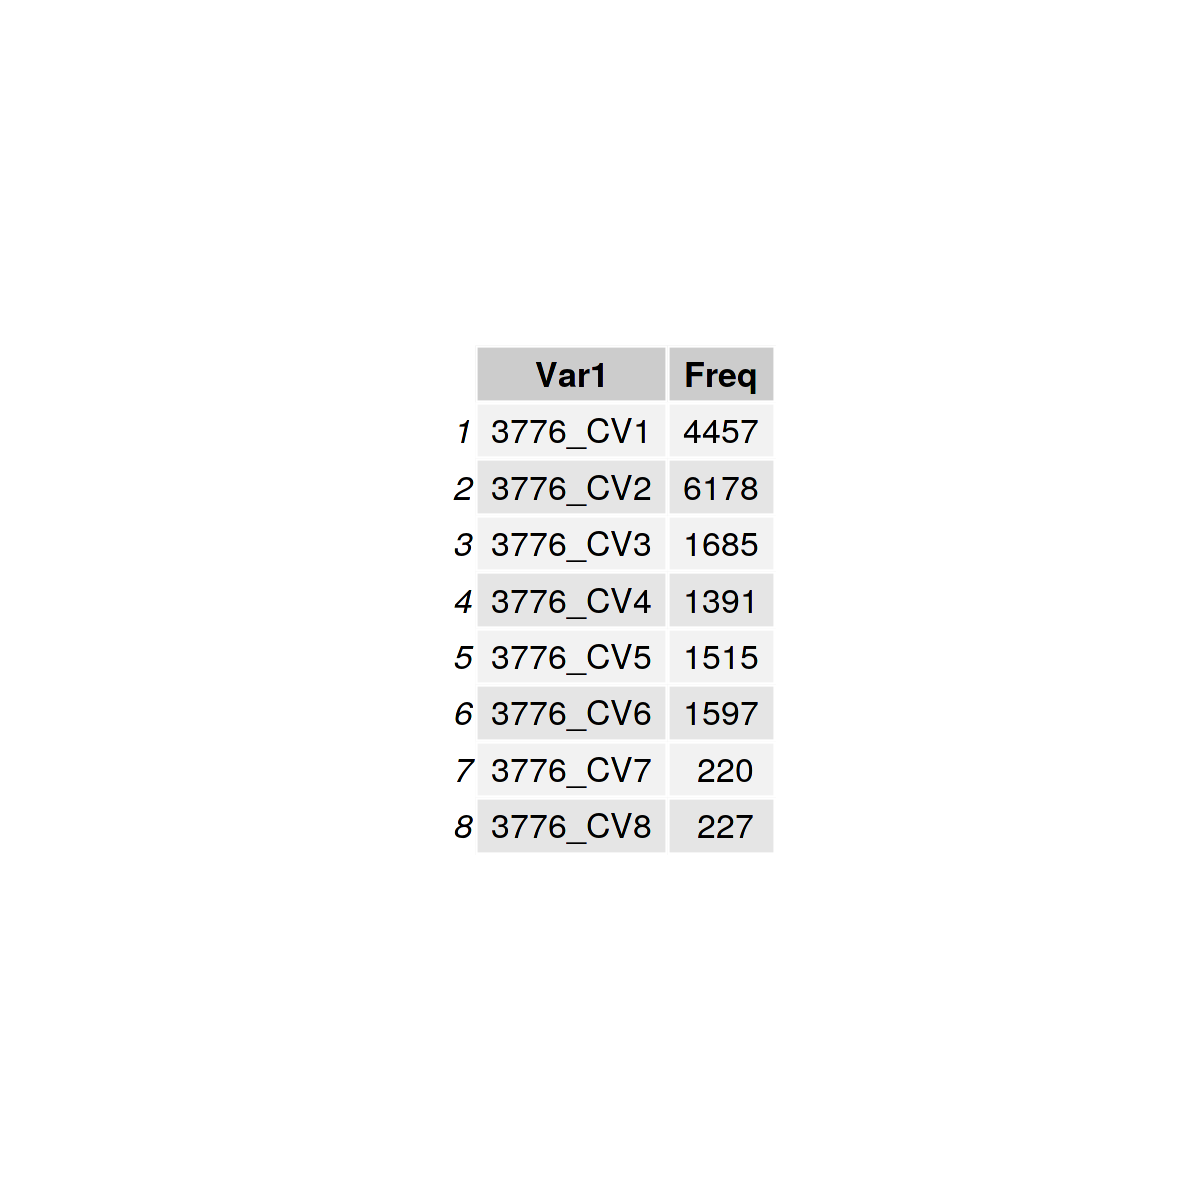

In [48]:
table(subset(comb_df, umis > 500 & hqaa > 5000 & tss_enrichment > 2, "Sample")) %>% as.data.frame() %>% gridExtra::grid.table()

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 8355 rows containing missing values (geom_point)."


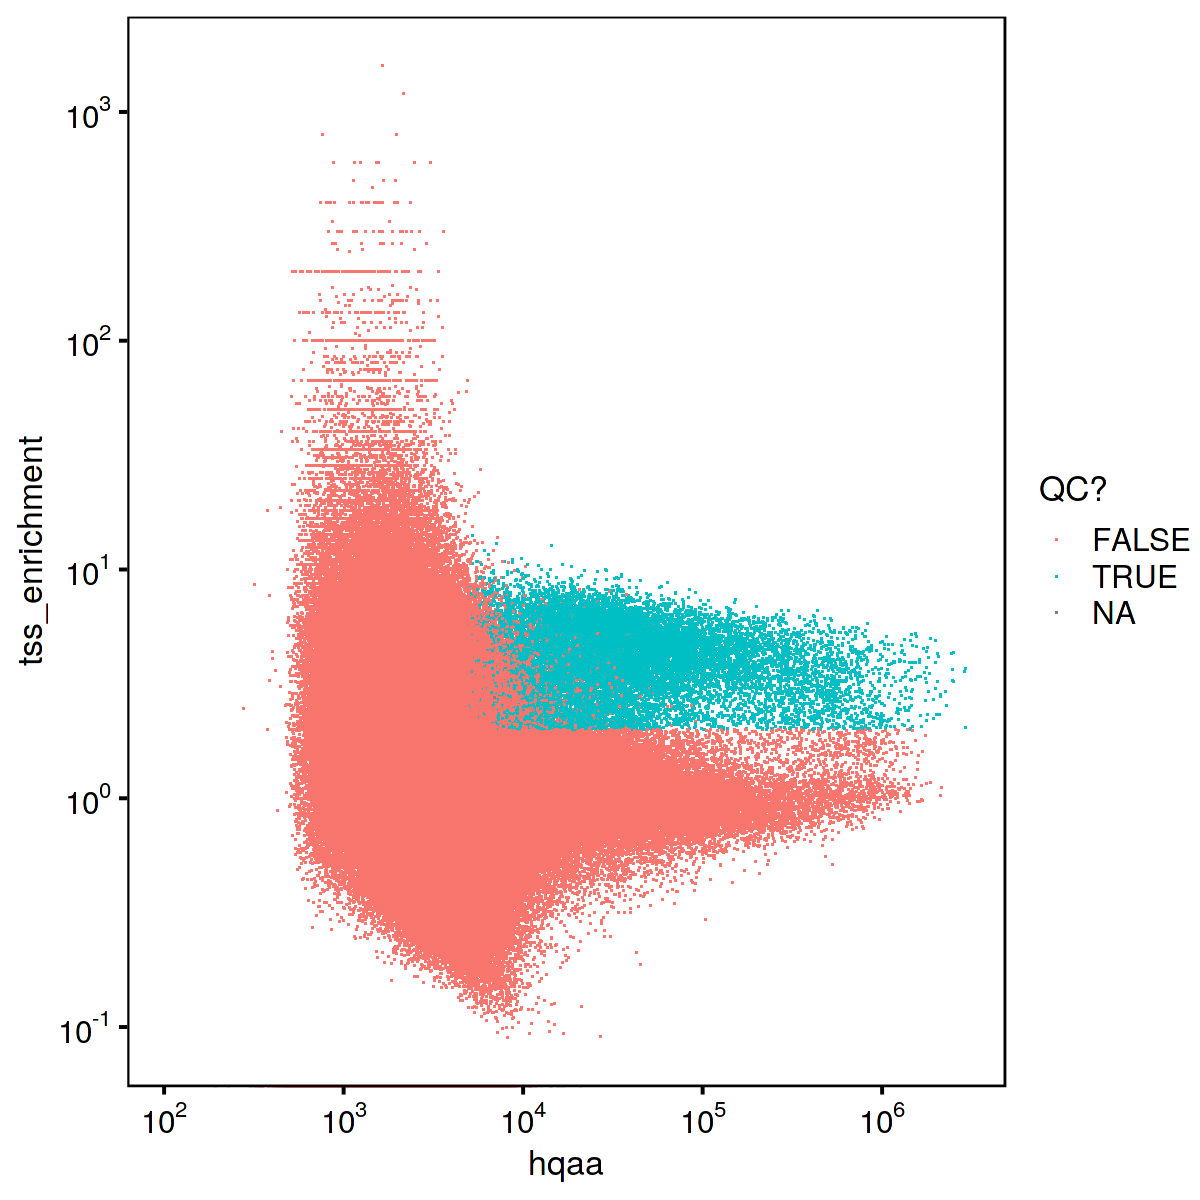

In [52]:
ggplot(comb_df, aes(hqaa, tss_enrichment)) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    geom_point(aes(col = umis > 500 & hqaa > 5000 & tss_enrichment > 2), shape = '.') +
    labs(col = "QC Pass?")

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 5004 rows containing missing values (geom_point)."


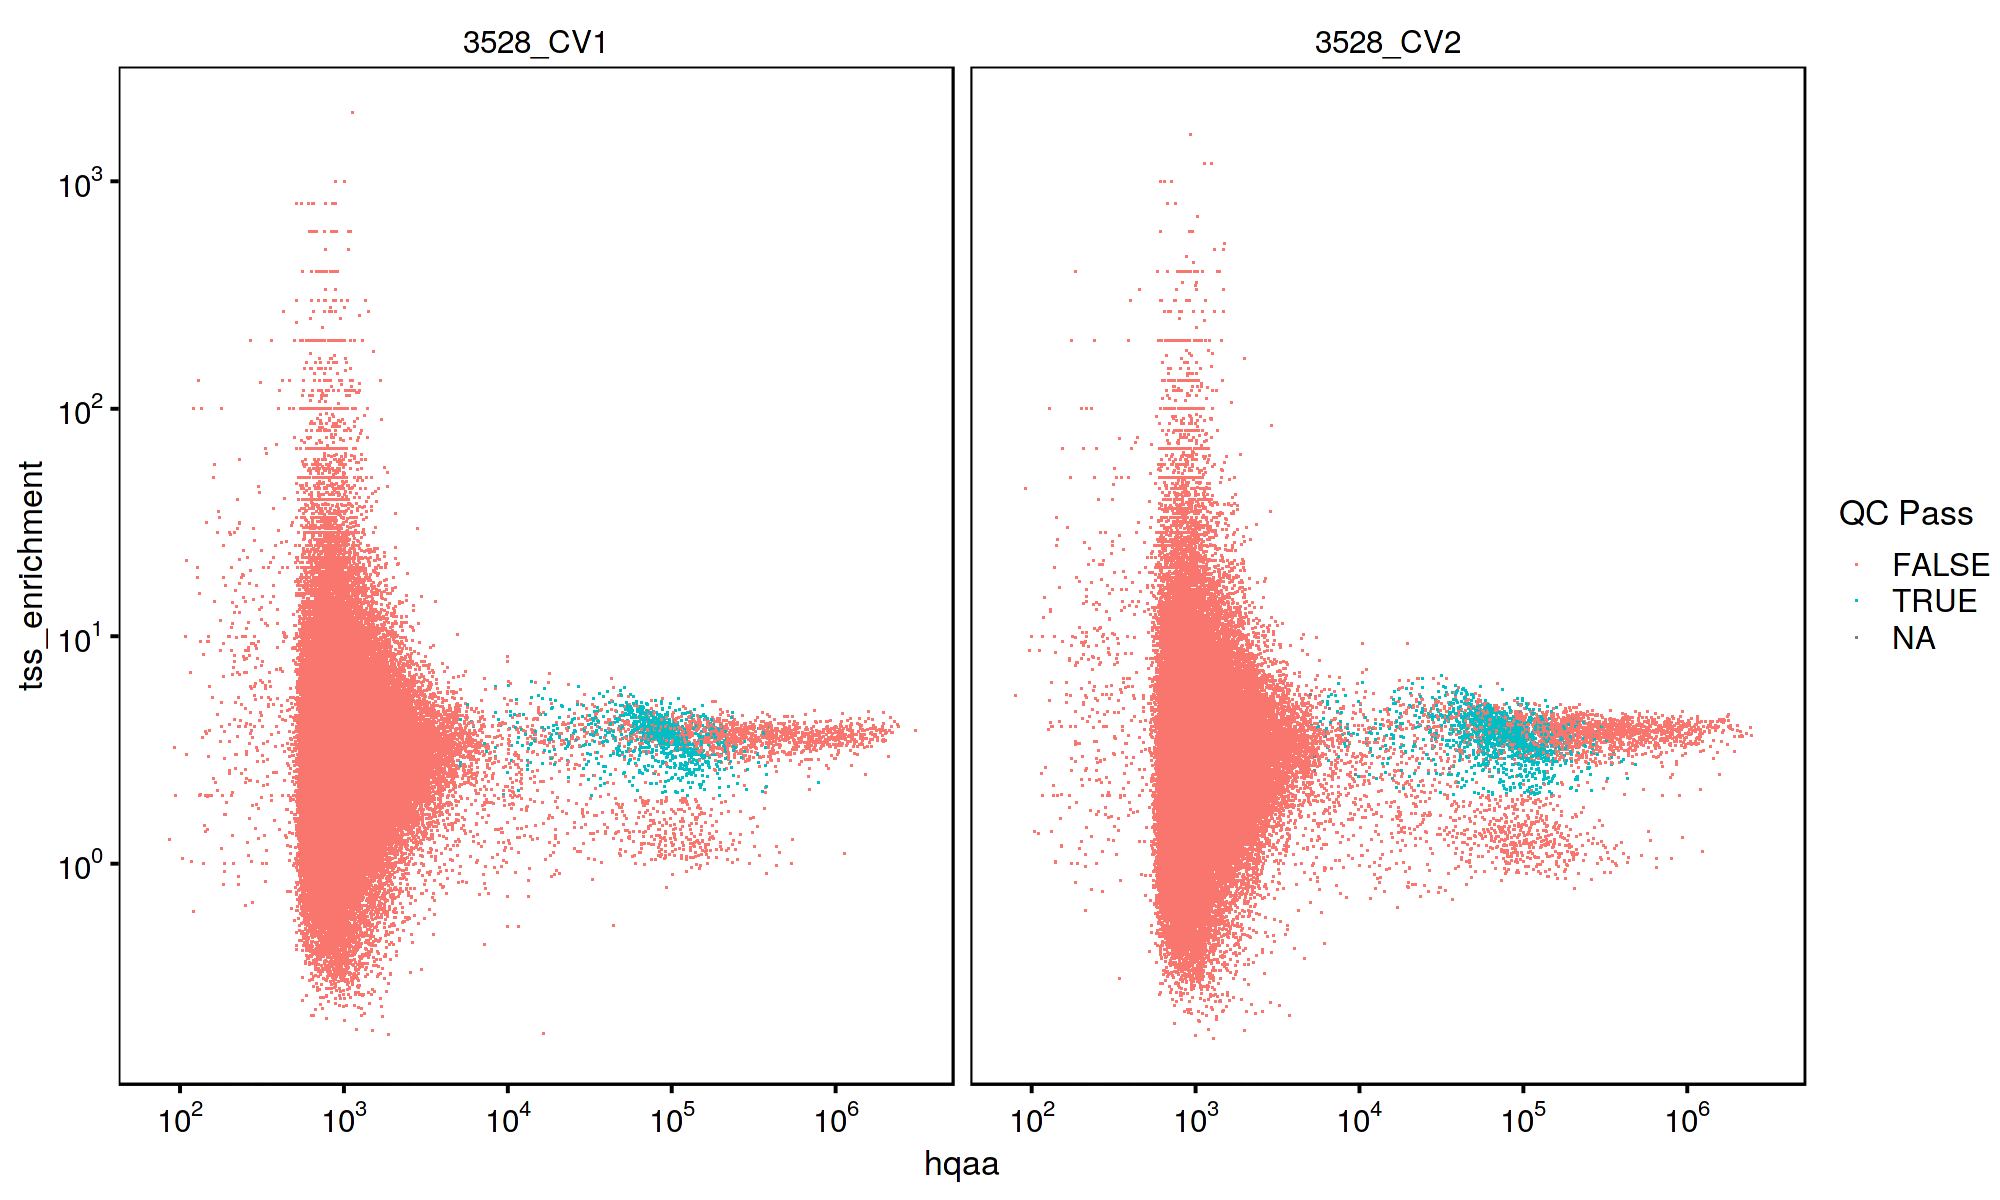

In [209]:
ggplot(demux_comb_df, aes(hqaa, tss_enrichment)) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    geom_point(aes(col = Pass_QC & (Demux_both == "SNG")), shape = '.') +
    facet_wrap(~ Sample) +
    labs(col = "QC Pass")

## Demuxlet results

In [74]:
atac_demux <- lapply(atac_libs, function(x) {
    list.files(glue("{root}/work/demuxlet_atac/demuxlet"), glue("{x}.*.best"), full.names = T) %>%
    map(function(x) read.table(x, header = T)) %>%
    reduce(rbind) %>%
    dplyr::mutate(Sample = gsub("_ATAC", "", x))
}) %>% bind_rows() %>%
    dplyr::mutate(ATAC_Demux = stringr::str_split(BEST, "-", simplify = TRUE)[, 1]) %>%
    dplyr::select(BARCODE, RD.UNIQ, SNG.1ST, PRB.SNG1, Sample, ATAC_Demux) %>%
    dplyr::rename(ATAC_SNG.1ST = SNG.1ST, ATAC_PRB.SNG1 = PRB.SNG1)

In [75]:
head(atac_demux)

,BARCODE,RD.UNIQ,ATAC_SNG.1ST,ATAC_PRB.SNG1,Sample,ATAC_Demux
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,AAACAAGCAAAGGACG,291,5_17277513-ND-43yF-SC,1,3776_CV1,DBL
2,AAACCGCCAGCAAATT,1993,2_AIA0286-ND-22yM-HPAP080,1,3776_CV1,DBL
3,AAACGAACACGTAGCG,335,5_17277513-ND-43yF-SC,1,3776_CV1,DBL
4,AAACGGTTCCCTCGTC,487,5_17277513-ND-43yF-SC,1,3776_CV1,DBL
5,AAACTCGCAATACCGA,596,5_17277513-ND-43yF-SC,1,3776_CV1,DBL
6,AAAGCCAGTTCACGCA,390,5_17277513-ND-43yF-SC,1,3776_CV1,DBL


In [78]:
rna_libs = glue("3776-CV-{1:8}-3GEX")
rna_demux <- lapply(rna_libs, function(x) {
    list.files(glue("{root}/work/demuxlet_rna/demuxlet"), glue("{x}.*.best"), full.names = T) %>%
    map(function(x) read.table(x, header = T)) %>%
    reduce(rbind) %>%
    dplyr::mutate(Sample = x)
}) %>% bind_rows() %>%
    dplyr::mutate(RNA_Demux = stringr::str_split(BEST, "-", simplify = TRUE)[, 1]) %>%
    dplyr::select(BARCODE, SNG.1ST, PRB.SNG1, Sample, RNA_Demux) %>%
    dplyr::rename(RNA_SNG.1ST = SNG.1ST, RNA_PRB.SNG1 = PRB.SNG1)

In [79]:
sample_col <- str_split(rna_demux$Sample, "-", simplify = T)
rna_demux$Sample <- paste0(sample_col[, 1], "_", sample_col[, 2], sample_col[, 3])
head(rna_demux)

,BARCODE,RNA_SNG.1ST,RNA_PRB.SNG1,Sample,RNA_Demux
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,AAACCAACATGGCCCA,1_AHLA313-ND-47yM-HPAP077,NaN,3776_CV1,DBL
2,AAACCGCGTAATCCCT,5_17277513-ND-43yF-SC,NaN,3776_CV1,DBL
3,AAACCGGCATAATGTC,2_AIA0286-ND-22yM-HPAP080,1,3776_CV1,SNG
4,AAACGGATCTAAGGTC,5_17277513-ND-43yF-SC,1,3776_CV1,SNG
5,AAAGCAAGTACCAGGT,5_17277513-ND-43yF-SC,1,3776_CV1,DBL
6,AAAGCAAGTTTACGTC,3_AIBT467-ND-19yM-IP,1,3776_CV1,DBL


In [80]:
demux_comb_df <- comb_df %>%
    left_join(atac_demux, by = c("Barcode" = "BARCODE", "Sample")) %>%
    left_join(rna_demux, by = c("rna_barcode" = "BARCODE", "Sample"))

In [81]:
head(demux_comb_df)

Sample,Barcode,tss_enrichment,percent_hqaa,hqaa,total_reads.x,total_autosomal_reads,percent_mitochondrial,percent_autosomal_duplicate,percent_duplicate,⋯,supplementary_alignments,umis,fraction_mitochondrial,RD.UNIQ,ATAC_SNG.1ST,ATAC_PRB.SNG1,ATAC_Demux,RNA_SNG.1ST,RNA_PRB.SNG1,RNA_Demux
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
3776_CV1,AAACAAGCAAAGGACG,3.8314176,63.63229,2838,4460,3644,0.17937220,18.6333699,17.1076233,⋯,0,73,0.020408163,291,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA
3776_CV1,AAACAAGCAAATATGC,4.6376812,65.03544,3854,5926,4986,0.16874789,19.5346972,17.7691529,⋯,0,67,0.031250000,393,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA
3776_CV1,AAACAAGCAACGGGAA,0.5938242,64.54995,7695,11921,9918,0.31876520,18.5117967,17.3139837,⋯,0,153,0.013392857,NA,NA,NA,NA,NA,NA,NA
3776_CV1,AAACAAGCAAGGACGA,4.6932618,67.58812,7555,11178,9560,0.08946144,18.6297071,17.5165504,⋯,0,3458,0.002137455,681,2_AIA0286-ND-22yM-HPAP080,1,DBL,2_AIA0286-ND-22yM-HPAP080,1,SNG
3776_CV1,AAACAAGCAAGTCCTT,1.4598540,79.60152,839,1054,868,1.51802657,0.2304147,0.1897533,⋯,0,7,0.000000000,NA,NA,NA,NA,NA,NA,NA
3776_CV1,AAACAAGCACCACAAA,1.5432099,64.87847,6833,10532,8749,0.24686669,18.5049720,17.5275351,⋯,0,73,0.085106383,695,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA


In [82]:
dim(demux_comb_df)
head(demux_comb_df)

[1] 472560     25

Sample,Barcode,tss_enrichment,percent_hqaa,hqaa,total_reads.x,total_autosomal_reads,percent_mitochondrial,percent_autosomal_duplicate,percent_duplicate,⋯,supplementary_alignments,umis,fraction_mitochondrial,RD.UNIQ,ATAC_SNG.1ST,ATAC_PRB.SNG1,ATAC_Demux,RNA_SNG.1ST,RNA_PRB.SNG1,RNA_Demux
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
3776_CV1,AAACAAGCAAAGGACG,3.8314176,63.63229,2838,4460,3644,0.17937220,18.6333699,17.1076233,⋯,0,73,0.020408163,291,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA
3776_CV1,AAACAAGCAAATATGC,4.6376812,65.03544,3854,5926,4986,0.16874789,19.5346972,17.7691529,⋯,0,67,0.031250000,393,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA
3776_CV1,AAACAAGCAACGGGAA,0.5938242,64.54995,7695,11921,9918,0.31876520,18.5117967,17.3139837,⋯,0,153,0.013392857,NA,NA,NA,NA,NA,NA,NA
3776_CV1,AAACAAGCAAGGACGA,4.6932618,67.58812,7555,11178,9560,0.08946144,18.6297071,17.5165504,⋯,0,3458,0.002137455,681,2_AIA0286-ND-22yM-HPAP080,1,DBL,2_AIA0286-ND-22yM-HPAP080,1,SNG
3776_CV1,AAACAAGCAAGTCCTT,1.4598540,79.60152,839,1054,868,1.51802657,0.2304147,0.1897533,⋯,0,7,0.000000000,NA,NA,NA,NA,NA,NA,NA
3776_CV1,AAACAAGCACCACAAA,1.5432099,64.87847,6833,10532,8749,0.24686669,18.5049720,17.5275351,⋯,0,73,0.085106383,695,5_17277513-ND-43yF-SC,1,DBL,NA,NA,NA


In [83]:
demux_comb_df <- demux_comb_df %>%
    mutate(Demux_both = ifelse(ATAC_Demux == RNA_Demux, ATAC_Demux, ifelse(ATAC_Demux == "SNG", "ATAC-SNG/RNA-DBL", "ATAC-DBL/RNA-SNG")))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 8355 rows containing missing values (geom_point)."


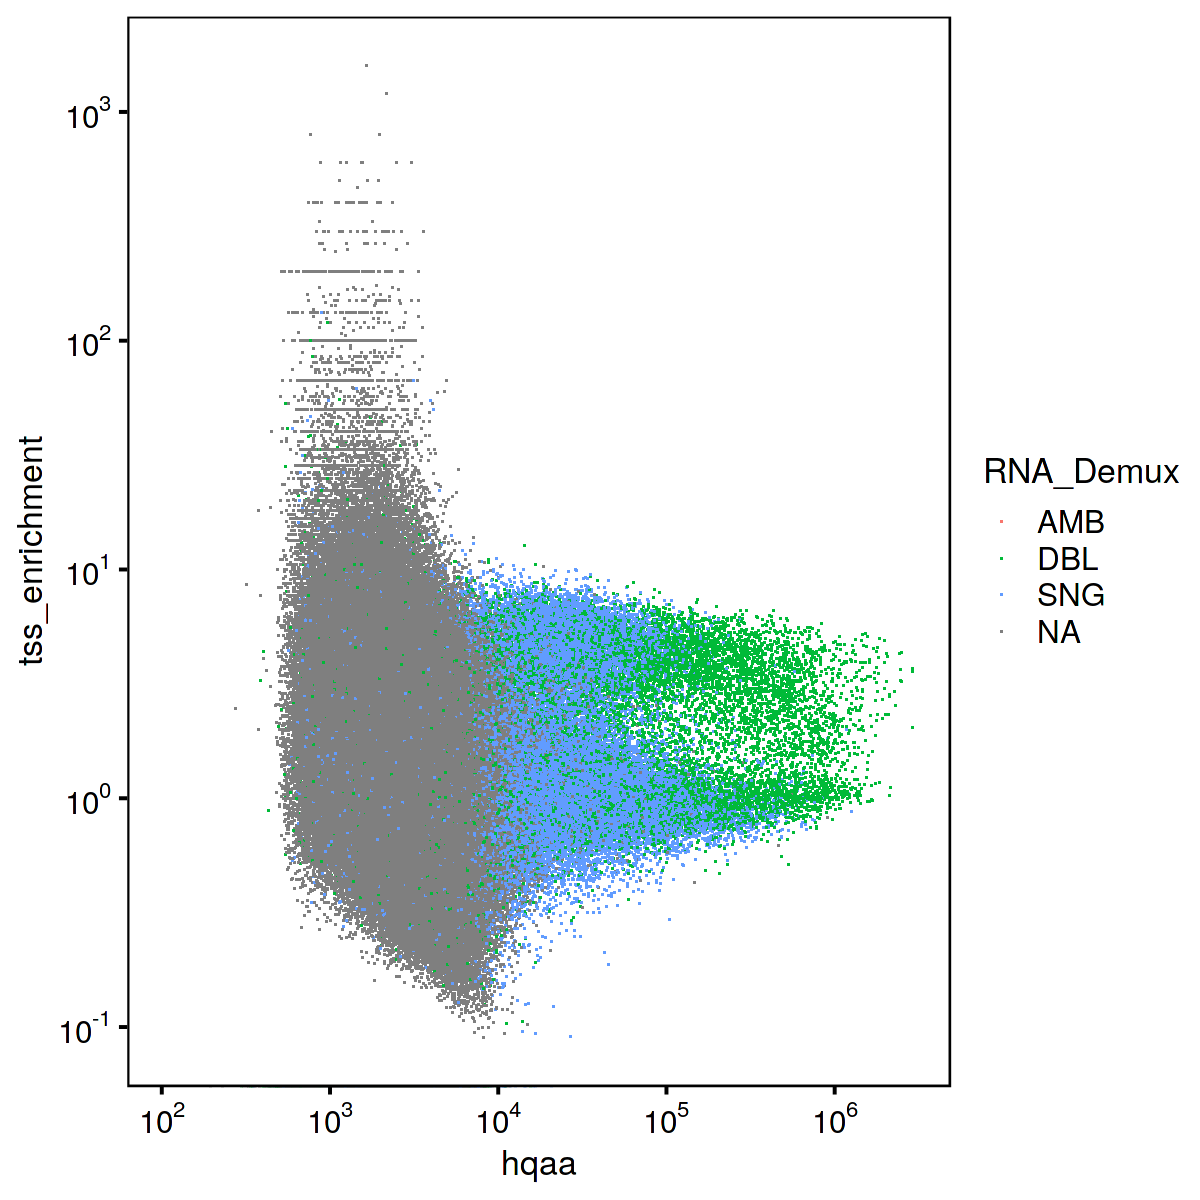

In [84]:
ggplot(demux_comb_df, aes(hqaa, tss_enrichment)) +
    geom_point(aes(col = RNA_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 8355 rows containing missing values (geom_point)."


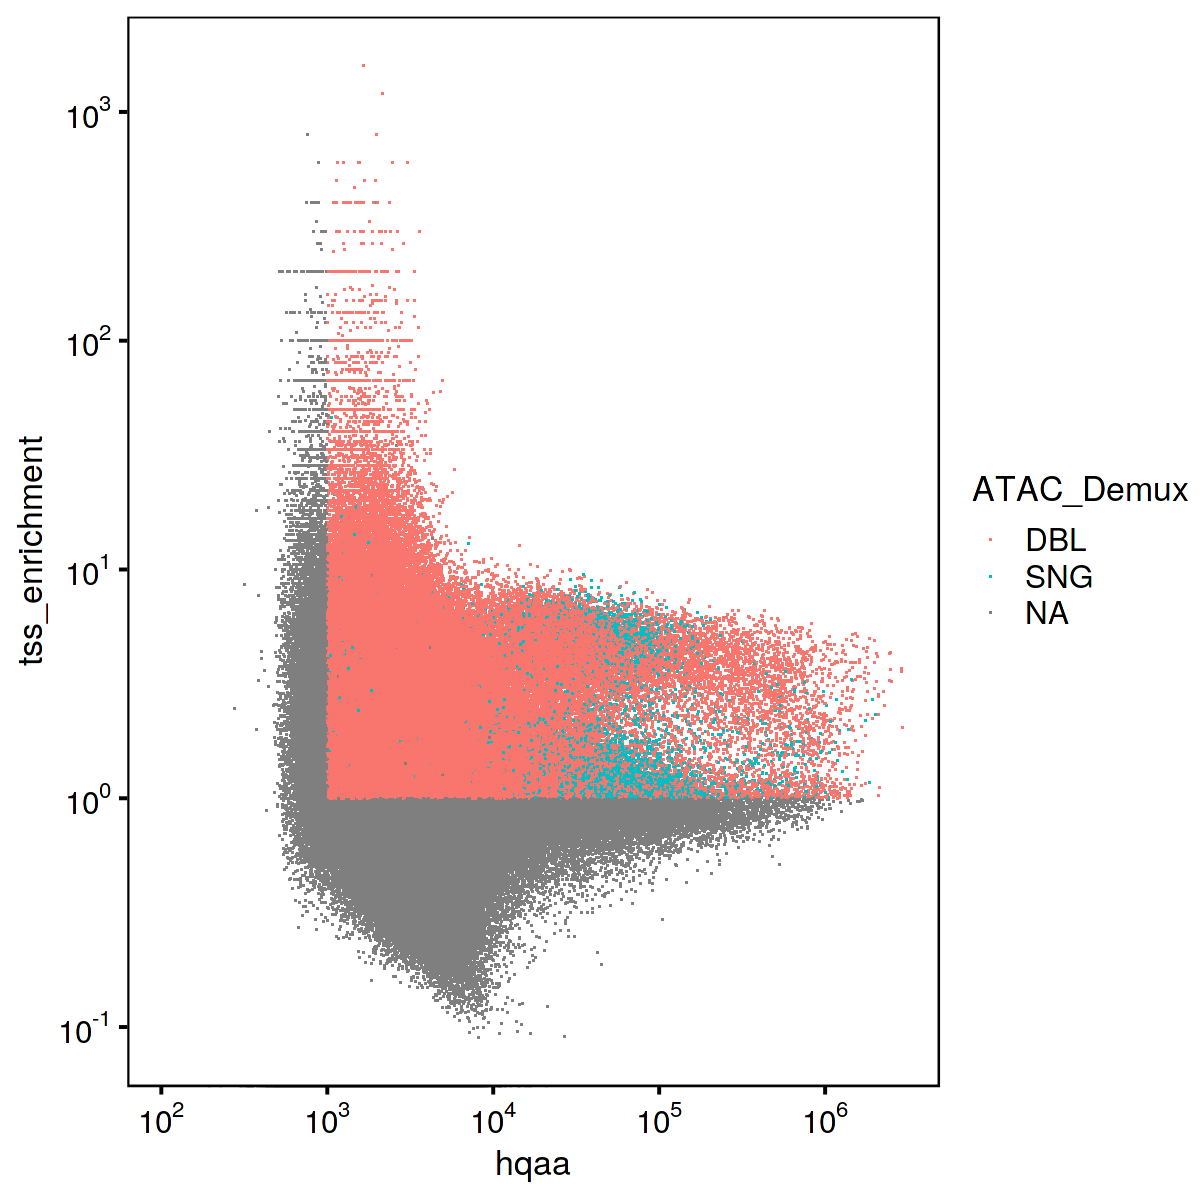

In [85]:
ggplot(demux_comb_df, aes(hqaa, tss_enrichment)) +
    geom_point(aes(col = ATAC_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


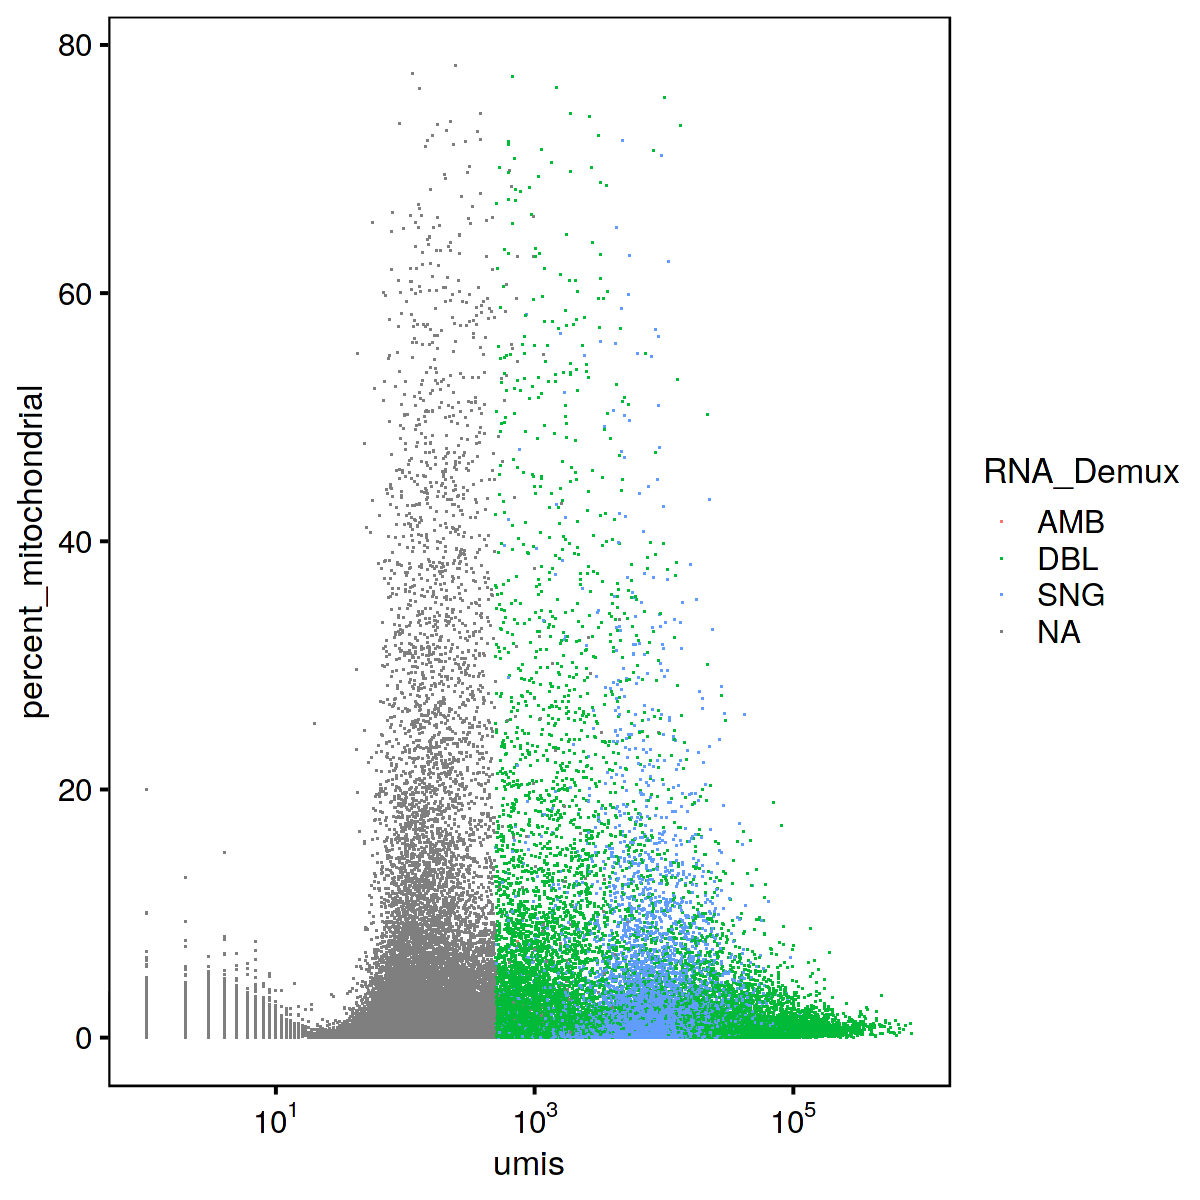

In [87]:
ggplot(demux_comb_df, aes(umis, percent_mitochondrial)) +
    geom_point(aes(col = RNA_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) #+
    #scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    #facet_wrap(~ Sample)

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


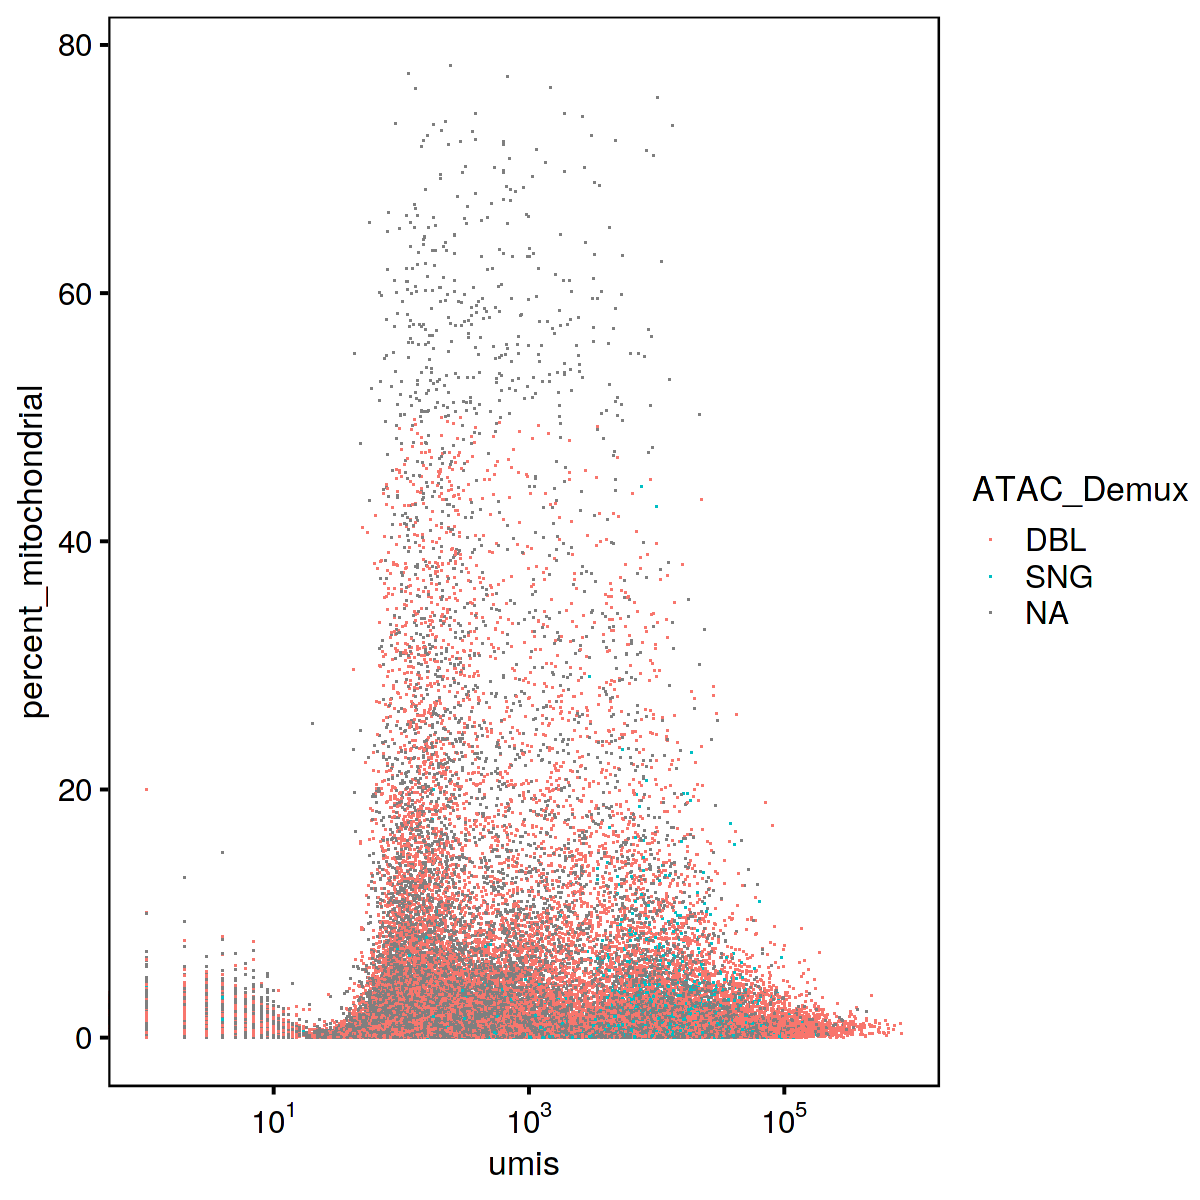

In [88]:
ggplot(demux_comb_df, aes(umis, percent_mitochondrial)) +
    geom_point(aes(col = ATAC_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) #+
    #scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    #facet_wrap(~ Sample)

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


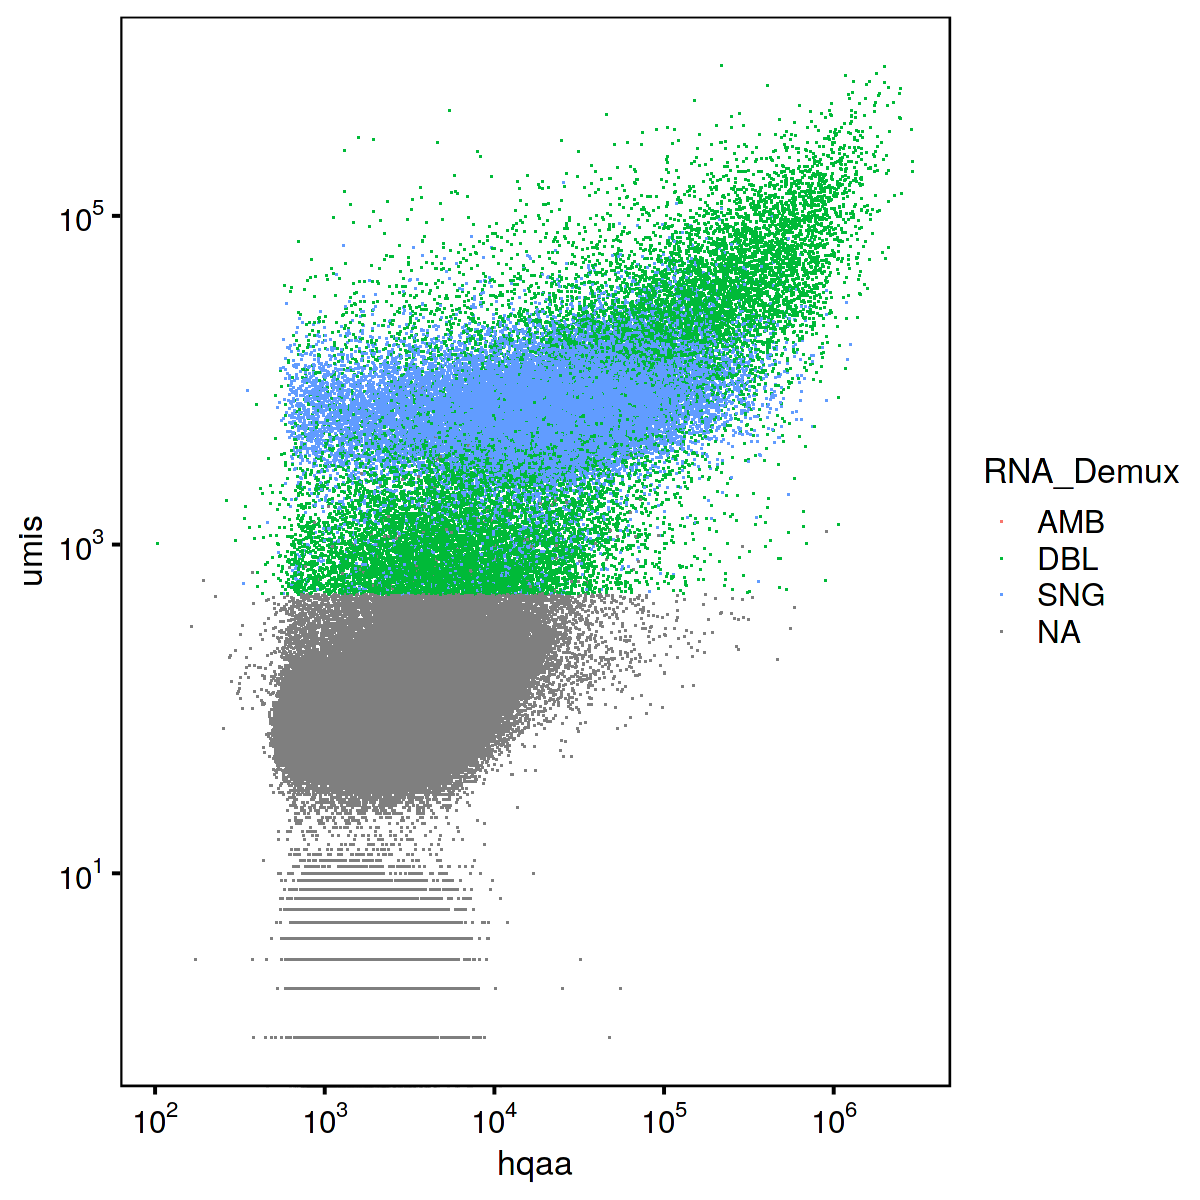

In [89]:
ggplot(demux_comb_df, aes(hqaa, umis)) +
    geom_point(aes(col = RNA_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 160 rows containing missing values (geom_point)."


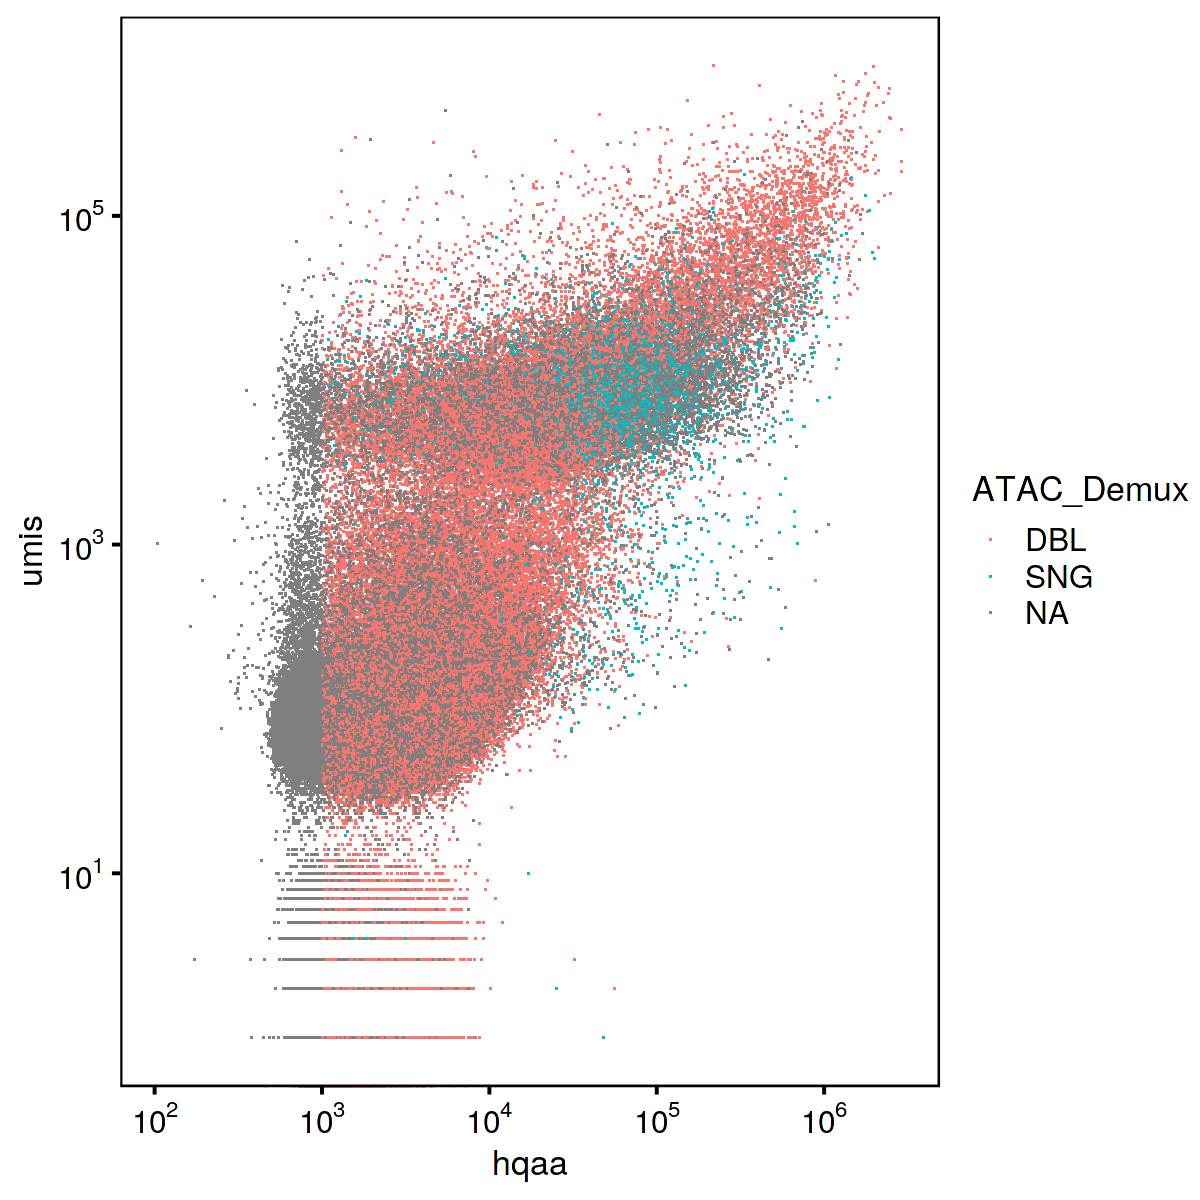

In [91]:
ggplot(demux_comb_df, aes(hqaa, umis)) +
    geom_point(aes(col = ATAC_Demux), shape = '.') +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 42006 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 42006 rows containing missing values (geom_point)."


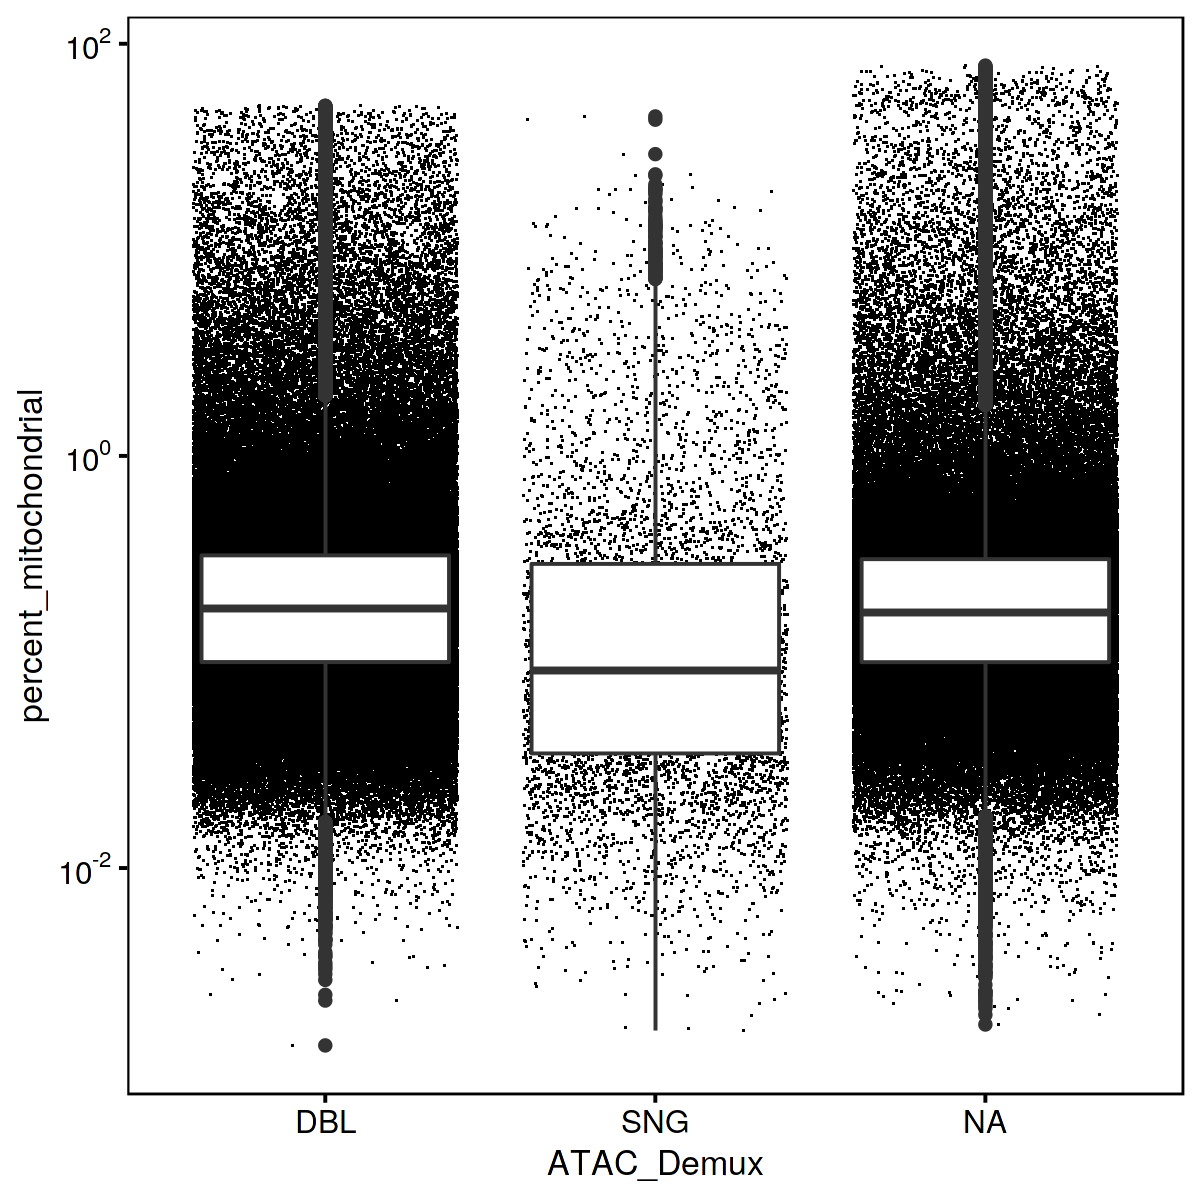

In [93]:
ggplot(demux_comb_df, aes(ATAC_Demux, percent_mitochondrial)) + 
    geom_jitter(shape = '.') + geom_boxplot() + 
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)))

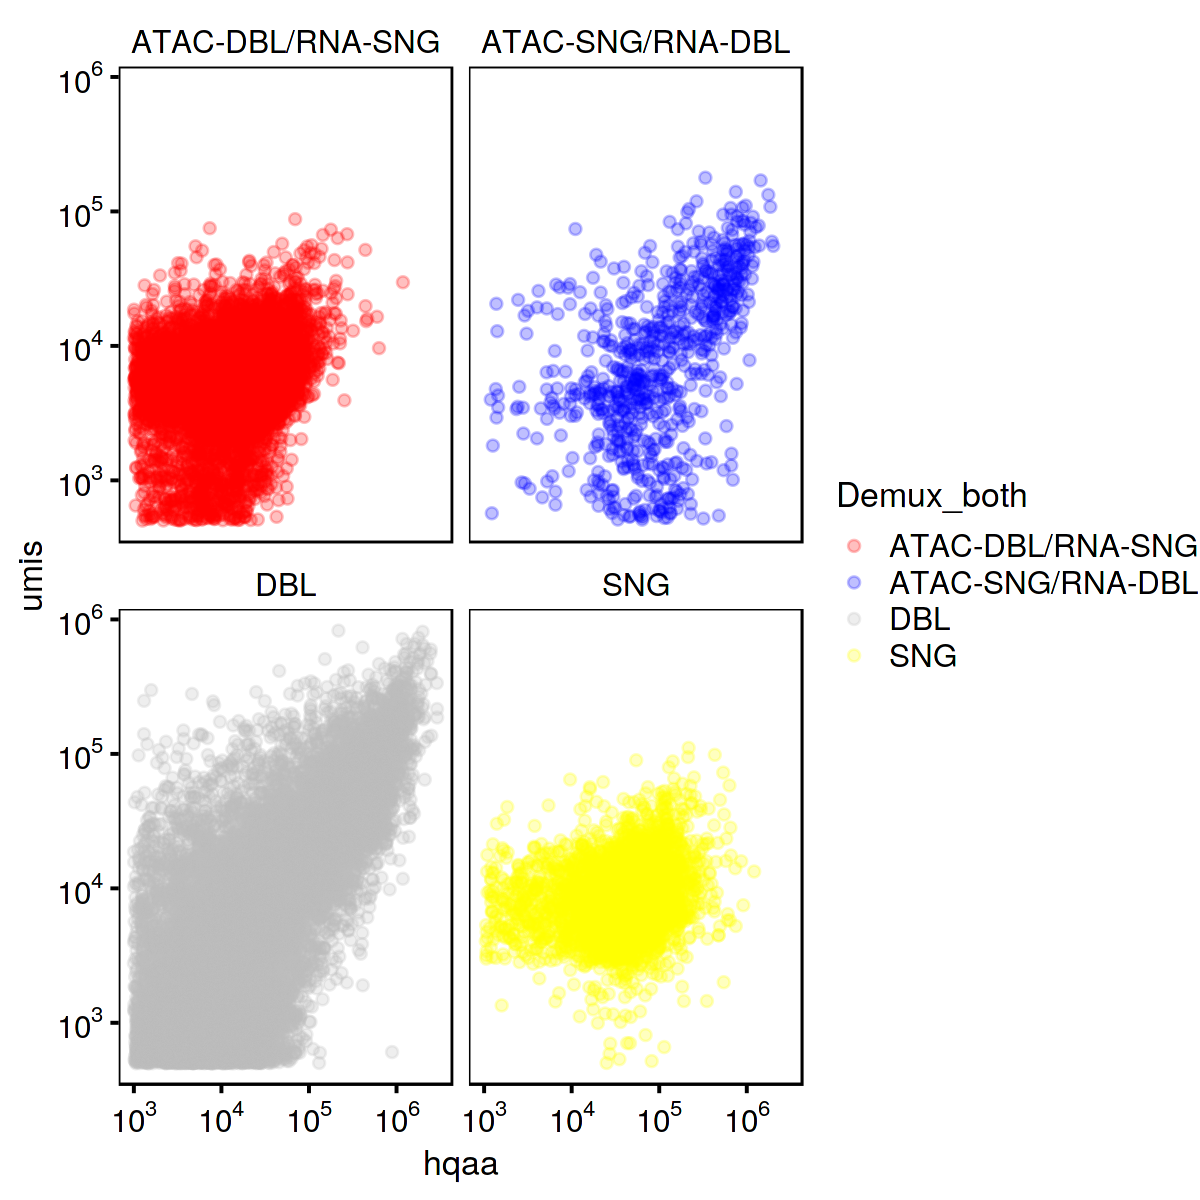

In [96]:
ggplot(demux_comb_df %>% filter(!is.na(Demux_both)), aes(hqaa, umis)) +
    geom_point(aes(col = Demux_both), alpha = .25) +
    scale_x_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x))) +
    scale_color_manual(values = c("red", "blue", "gray", "yellow")) +
    facet_wrap(~ Demux_both)

In [97]:
demux_comb_df$Pass_QC <- (demux_comb_df$hqaa >= 5000 & demux_comb_df$tss_enrichment >= 2 & demux_comb_df$umis >= 500)

In [98]:
table(subset(demux_comb_df, Pass_QC)$ATAC_Demux, subset(demux_comb_df, Pass_QC)$Sample)

     
      3776_CV1 3776_CV2 3776_CV3 3776_CV4 3776_CV5 3776_CV6 3776_CV7 3776_CV8
  DBL     4295     5997     1230      864     1489     1554      188      189
  SNG      162      184      455      527       25       41       32       39

In [99]:
table(subset(demux_comb_df, Pass_QC)$RNA_Demux, subset(demux_comb_df, Pass_QC)$Sample)

     
      3776_CV1 3776_CV2 3776_CV3 3776_CV4 3776_CV5 3776_CV6 3776_CV7 3776_CV8
  DBL     2192     4210      774      595      632      648       67       60
  SNG     2265     1968      908      795      880      946      153      168

In [101]:
table(subset(demux_comb_df, Pass_QC)$Demux_both, subset(demux_comb_df, Pass_QC)$Sample)

                  
                   3776_CV1 3776_CV2 3776_CV3 3776_CV4 3776_CV5 3776_CV6
  ATAC-DBL/RNA-SNG     2132     1840      489      295      862      920
  ATAC-SNG/RNA-DBL       29       56       35       27        7       16
  DBL                  2162     4153      739      568      624      631
  SNG                   133      128      419      500       18       25
                  
                   3776_CV7 3776_CV8
  ATAC-DBL/RNA-SNG      122      132
  ATAC-SNG/RNA-DBL        1        3
  DBL                    66       57
  SNG                    31       36

In [102]:
table(
    subset(demux_comb_df, Pass_QC & Demux_both == "SNG")$RNA_Demux,
    subset(demux_comb_df, Pass_QC & Demux_both == "SNG")$Sample
)

     
      3776_CV1 3776_CV2 3776_CV3 3776_CV4 3776_CV5 3776_CV6 3776_CV7 3776_CV8
  SNG      133      128      419      500       18       25       31       36

## Save barcodes corresponding to SNG and PASS QC

In [103]:
# ATAC Demuxlet is poor; so we'll ignore that and only use RNA demuxlet results
dir.create(glue("{root}/work/nuclei-qc/atac"), recursive = T, showWarnings = F)
dir.create(glue("{root}/work/nuclei-qc/rna"), recursive = T, showWarnings = F)
write.table(file = glue("{root}/work/nuclei-qc/atac/atac_barcodes_post-qc.txt"), subset(demux_comb_df, Pass_QC & RNA_Demux == "SNG")[, c("Barcode", "Sample")], col.names = F, row.names = F, quote = F)
write.table(file = glue("{root}/work/nuclei-qc/rna/rna_barcodes_post-qc.txt"), subset(demux_comb_df, Pass_QC & RNA_Demux == "SNG")[, c("rna_barcode", "Sample")], col.names = F, row.names = F, quote = F)


write.table(file = glue("{root}/work/nuclei-qc/metrics_allcols-barcodes_post-qc.txt"), subset(demux_comb_df, Pass_QC & RNA_Demux == "SNG"), col.names = T, row.names = F, quote = F)

# DropletUtils

In [ ]:
library(DropletUtils)
make_knee_plot <- function(br.out) {
    plot(br.out$rank, br.out$total, log="xy", xlab="Rank", ylab="Total")
o <- order(br.out$rank)
lines(br.out$rank[o], br.out$fitted[o], col="red")

abline(h=metadata(br.out)$knee, col="dodgerblue", lty=2)
abline(h=metadata(br.out)$inflection, col="forestgreen", lty=2)
legend("bottomleft", lty=2, col=c("dodgerblue", "forestgreen"), 
    legend=c("knee", "inflection"))
}

In [126]:
rna_10x_cv1 = read10xCounts("/lab/data/seqcore/3528-CV/10x_analysis_3528-CV/Sample_3528-CV-1/filtered_feature_bc_matrix", version='3', col.names=TRUE)
rna_10x_cv2 = read10xCounts("/lab/data/seqcore/3528-CV/10x_analysis_3528-CV/Sample_3528-CV-2/filtered_feature_bc_matrix", version='3', col.names=TRUE)

In [129]:
rna_cv1_out <- barcodeRanks(counts(rna_10x_cv1), lower=1000)
make_knee_plot(rna_cv1_out)

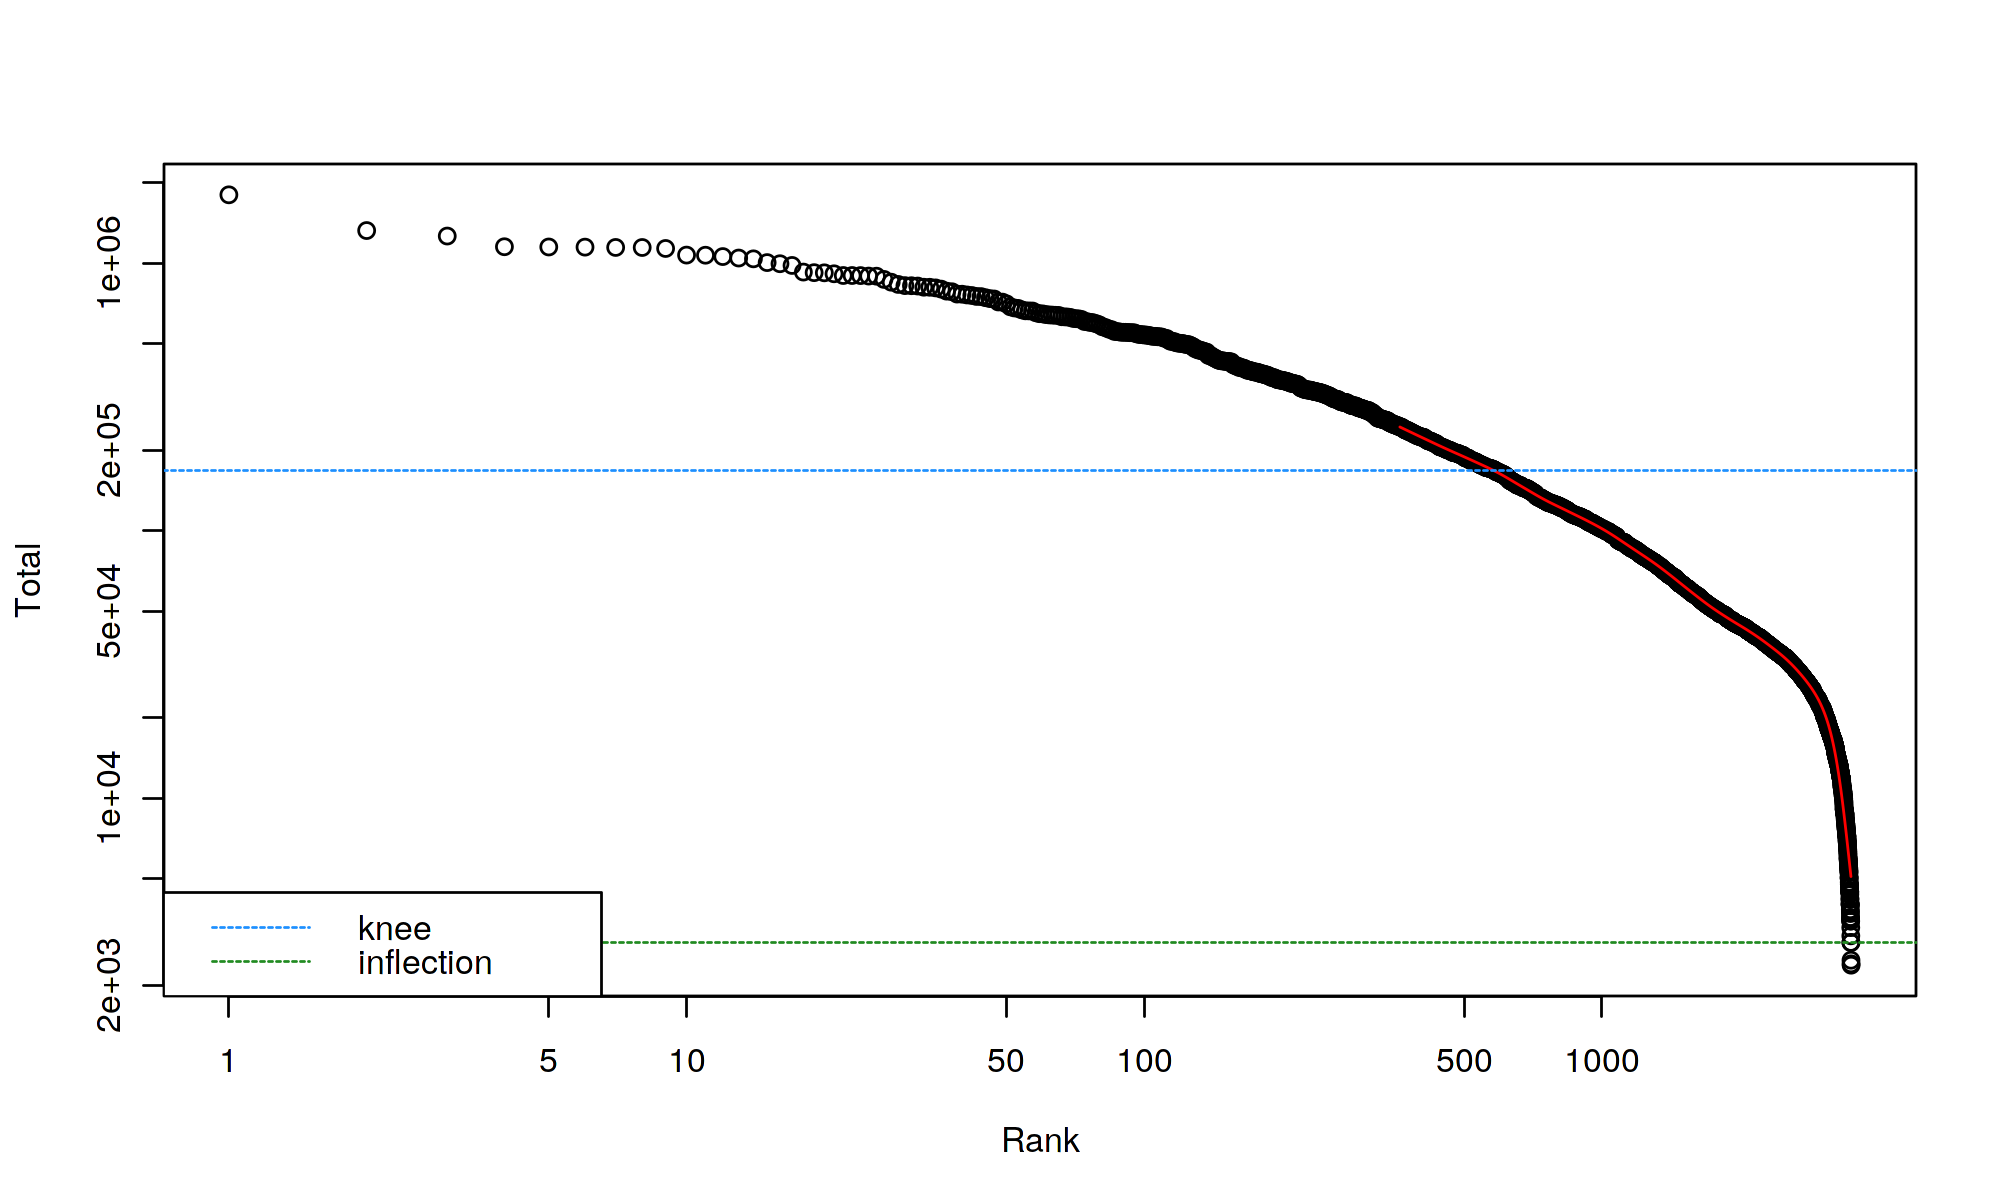

In [195]:
rna_cv2_out <- barcodeRanks(counts(rna_10x_cv2), lower=1000)
make_knee_plot(rna_cv2_out)